<a href="https://colab.research.google.com/github/CamillaLe/World-Hapiness-and-Sustainability-/blob/main/Copy_of_Duyen's_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

First, let's import some libraries for data processing, visualization and clustering.

In [ ]:
# Import the pandas library to work with data.
import pandas as pd

# Import the pyplot module from the matplotlib library to create plots.
import matplotlib.pyplot as plt

# Import os to work with path
import os

# Import numpy for linear algebra
import numpy as np

# Import seaborn for data visualization
import seaborn as sns

#This is an ML library that we install it in order to be able to use K-means clustering
!pip install scikit-learn

#scikit learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#I. DATA EXPLORATION

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive') # Connect Colab to Google Drive and mount it to the /content/drive directory.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Because The World Happiness Report dataset consists of 9 CSV files, each file associated with the corresponding year of recorded data, and all are stored in a folder on Google Drive. Therefore, I need to read these 9 files and merge them into a single DataFrame with information about countries updated annually.

In [ ]:
# Specify the path to the folder containing CSV files on Google Drive
folder_path_WHR = '/content/drive/MyDrive/data set for python project/world happiness report 2025-2023'
# Create an empty list to store DataFrames from CSV files
dfs = []

# Loop through each CSV file in the specified folder on Google Drive.
for file_name in os.listdir(folder_path_WHR):
    file_path_WHR = os.path.join(folder_path_WHR, file_name)
    temp_df = pd.read_csv(file_path_WHR)
    # Add a 'year' column to the DataFrame to store the corresponding year for the data.
    temp_df['year'] = int(file_name.split('_')[1].split('.')[0])
    # Extract the year from the file name and convert it to an integer
    # Append the current DataFrame to the list
    dfs.append(temp_df)

# Concatenate all DataFrames in the list
concatenated_data_WHR = pd.concat(dfs, ignore_index=True)

# Sort by the 'country' and 'year' column
concatenated_data_WHR.sort_values(by=['country','year'], inplace=True)

# Reset the index
concatenated_data_WHR.reset_index(drop=True, inplace=True)

# Save the concatenated and sorted DataFrame to a CSV file
concatenated_data_WHR.to_csv('/content/drive/MyDrive/data set for python project/WHR_Data.csv',
                             index=False)

In [ ]:
#Read the data
df= pd.read_csv('/content/drive/MyDrive/data set for python project/WHR_Data.csv')
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Afghanistan,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,2015
1,Afghanistan,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,2016
2,Afghanistan,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2017
3,Afghanistan,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018
4,Afghanistan,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019
...,...,...,...,...,...,...,...,...,...,...
1362,Zimbabwe,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019
1363,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020
1364,Zimbabwe,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000,2021
1365,Zimbabwe,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,2022


Let's inspect some basic information from the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


The data has 1367 rows (from 0 to 1366) and 10 columns.

There are 2 columns with object data type (country and region),  7 columns with float64 data type and 1 column with int64 data type (year).

There are missing values in the 'healthy_life_expectancy' and 'perceptions_of_corruption' columns. Both are numerical variables and each of these columns has 1 missing value.

In [ ]:
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

Now let's see how the data looks like

In [ ]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Afghanistan,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,2015
1,Afghanistan,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2016
2,Afghanistan,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2017
3,Afghanistan,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2018
4,Afghanistan,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,2019


In [ ]:
df.tail()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1362,Zimbabwe,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019
1363,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020
1364,Zimbabwe,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000,2021
1365,Zimbabwe,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,2022
1366,Zimbabwe,Sub-Saharan Africa,3.2040,0.758000,0.881000,0.069000,0.363000,0.112000,0.117000,2023


In [ ]:
# Print row with Null value
df[df.isnull().any(axis=1)]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1149,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023
1281,United Arab Emirates,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [ ]:
# Sort values to check if data for each country has been recorded properly over the years
df.groupby('country').country.count().sort_values(ascending = False)

country
Cyprus                11
Afghanistan            9
Moldova                9
Mongolia               9
Montenegro             9
                      ..
State of Palestine     1
Congo                  1
Somaliland region      1
Somaliland Region      1
Puerto Rico            1
Name: country, Length: 171, dtype: int64

As we can see, Cyprus recorded more than 1 data per year in the year 2018 and 2019. The error may result from inaccurate data entry.

In [ ]:
df[df['country']=='Cyprus']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
297,Cyprus,Western Europe,5.689,1.208130,0.893180,0.923560,0.406720,0.306380,0.061460,2015
298,Cyprus,Western Europe,5.546,1.318570,0.706970,0.848800,0.295070,0.279060,0.052280,2016
299,Cyprus,Western Europe,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,2017
300,Cyprus,Western Europe,5.835,1.229000,1.211000,0.909000,0.495000,0.179000,0.154000,2018
301,Cyprus,Western Europe,5.762,1.229000,1.191000,0.909000,0.423000,0.202000,0.035000,2018
302,Cyprus,Western Europe,6.046,1.263000,1.223000,1.042000,0.406000,0.190000,0.041000,2019
303,Cyprus,Western Europe,5.718,1.263000,1.252000,1.042000,0.417000,0.191000,0.162000,2019
304,Cyprus,Western Europe,6.159,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2020
305,Cyprus,Western Europe,6.223,1.377000,0.765000,0.801000,0.464000,0.178000,0.061000,2021
306,Cyprus,Western Europe,6.221,1.815000,0.909000,0.819000,0.448000,0.123000,0.062000,2022


Let's check if there are any countries that have more than one record for a year.

In [ ]:
def check_duplicate_records(df):
    # Group by country and year, then count the number of records for each group
    records_count = df.groupby(['country', 'year']).size().reset_index(name='record_count')

    # Filter rows with record count greater than 1
    duplicate_records = records_count[records_count['record_count'] > 1]

    return duplicate_records

duplicate_records_df = check_duplicate_records(df)

# Print the result
print(duplicate_records_df)

    country  year  record_count
300  Cyprus  2018             2
301  Cyprus  2019             2


Only Cyprus have duplicated values.
Let's check if there are countries have fewer than 9 records for each year from 2015 to 2023.

In [ ]:
filtered_countries= df[df.groupby('country')['country'].transform('count') < 9]
country_counts = filtered_countries['country'].value_counts()
print(country_counts)

# Print the number of countries with fewer than 9 records
total_unique_countries = filtered_countries["country"].nunique()
print(f'Total unique countries with fewer than 9 records: {total_unique_countries}')

# Print the number of records for those countries
total_count = filtered_countries['country'].count()
print(f"Total count of records for countries with fewer than 9 records: {total_count}")

#Print missing rows need to be filled
missing_rows = (9 * total_unique_countries - total_count)
print(f'Total missing rows for countries: {missing_rows}')

Mozambique                  8
Kuwait                      8
Turkmenistan                8
Turkey                      8
Rwanda                      8
Palestinian Territories     8
Namibia                     8
Azerbaijan                  8
Libya                       8
Laos                        8
Yemen                       8
Belarus                     8
Congo (Brazzaville)         8
Czech Republic              7
Haiti                       7
Congo (Kinshasa)            7
Lesotho                     7
Burundi                     7
Comoros                     7
North Cyprus                6
Trinidad and Tobago         6
Qatar                       5
South Sudan                 5
Syria                       5
Central African Republic    5
Gambia                      5
Bhutan                      5
Sudan                       4
Swaziland                   4
Somalia                     4
Angola                      4
Belize                      3
Czechia                     2
Suriname  

Let's inspect the distribution of numerical variables.

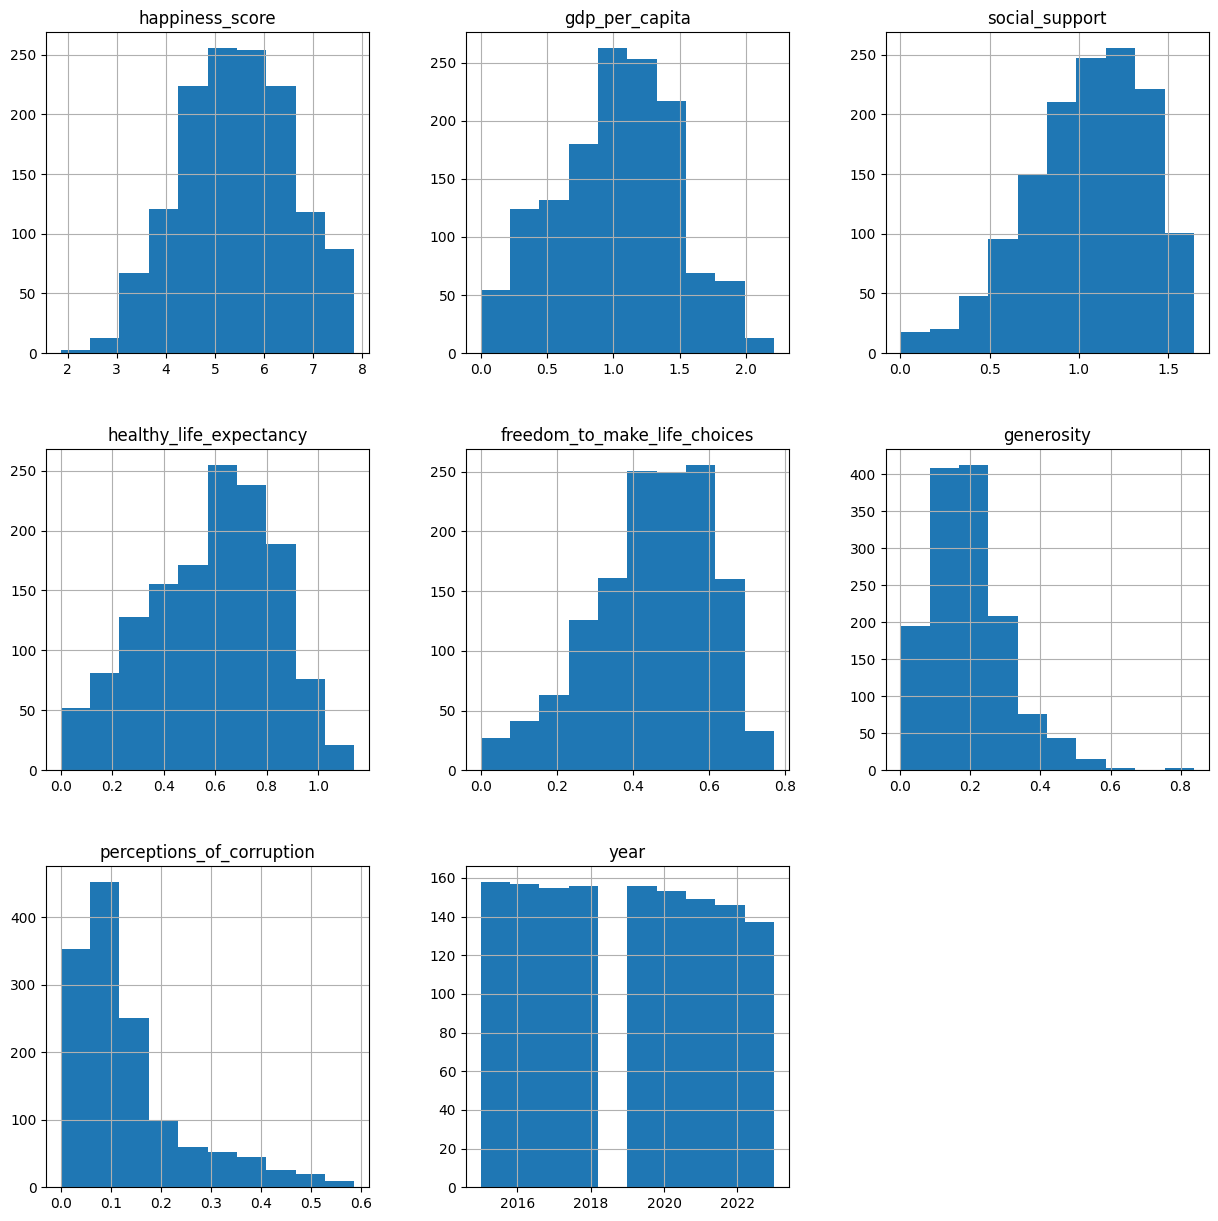

In [ ]:
# Check histogram of the numerical variables.
df.hist(figsize=(15,15))
plt.show()

The histograms show us that most of the variables follow normal distribution, such as happiness_score, gdp_per_capita, social_support,
healthy_life_expectancy, freedom_to_make_life_choices; while some are right skewed as generosity, perceptions_of_corruption. We will process these values later.Let's have a look at some statistics of the dataset


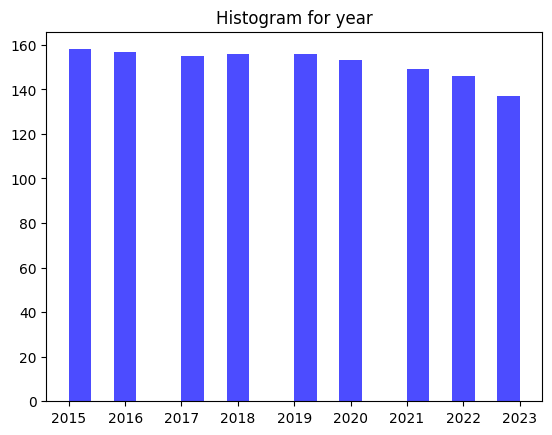

In [ ]:
#Histogram for 'year'column
plt.hist(df['year'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram for year')
plt.show()

Let's inspect some basic statistic of the df

In [ ]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [ ]:
df.shape

(1367, 10)

Check outliers of numerical variables

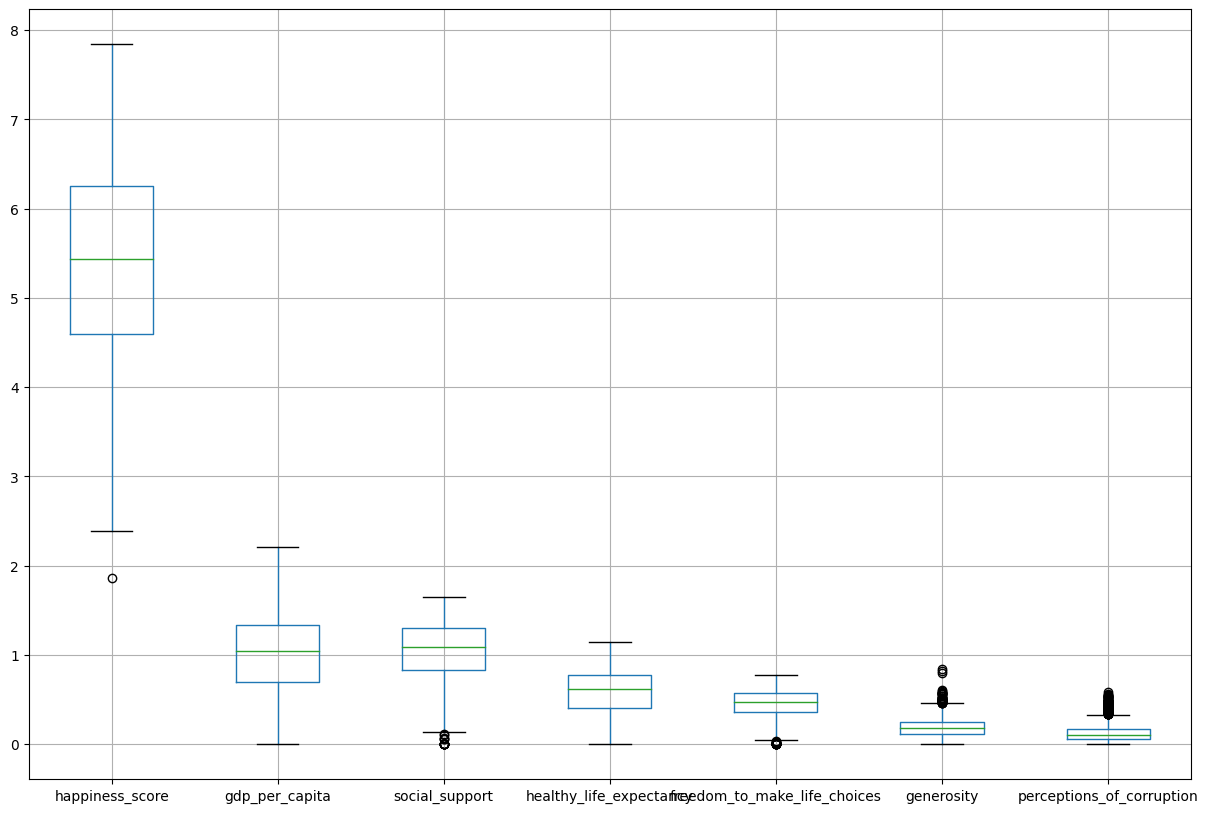

In [ ]:
numerical_columns = df[['happiness_score', 'gdp_per_capita', 'social_support',
                        'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]
numerical_columns.boxplot(figsize=(15, 10))
plt.show()

The data range of the columns can be seen to be small, and there are not many outliers, we may need to check outliers for the columns 'generosity' and 'perceptions_of_corruption'

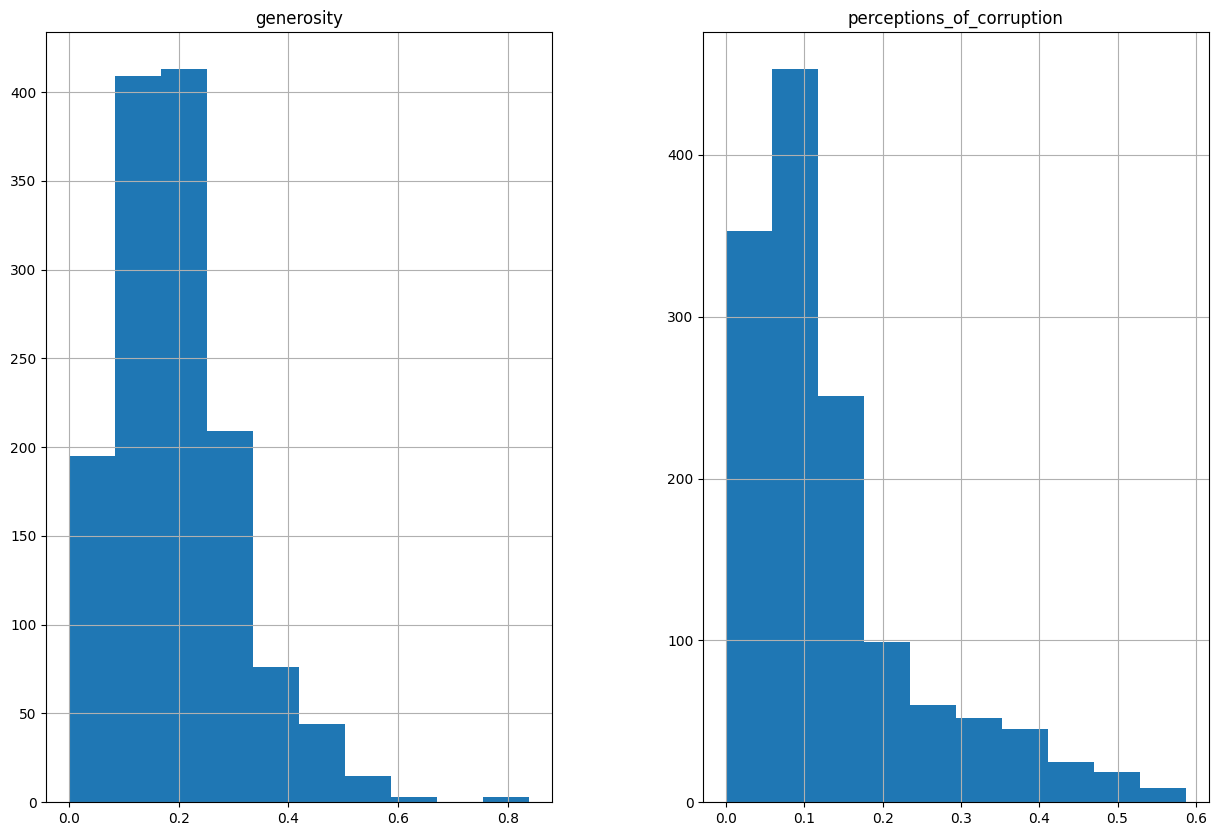

In [ ]:
outlier = ['generosity','perceptions_of_corruption']
df[outlier].hist(bins=10, figsize=(15,10))
plt.show()

We can see that the distribution of 'generosity' and 'perceptions_of_corruption'variable is skewed and need to be taken care of

<ipython-input-20-0355708037a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".1g")


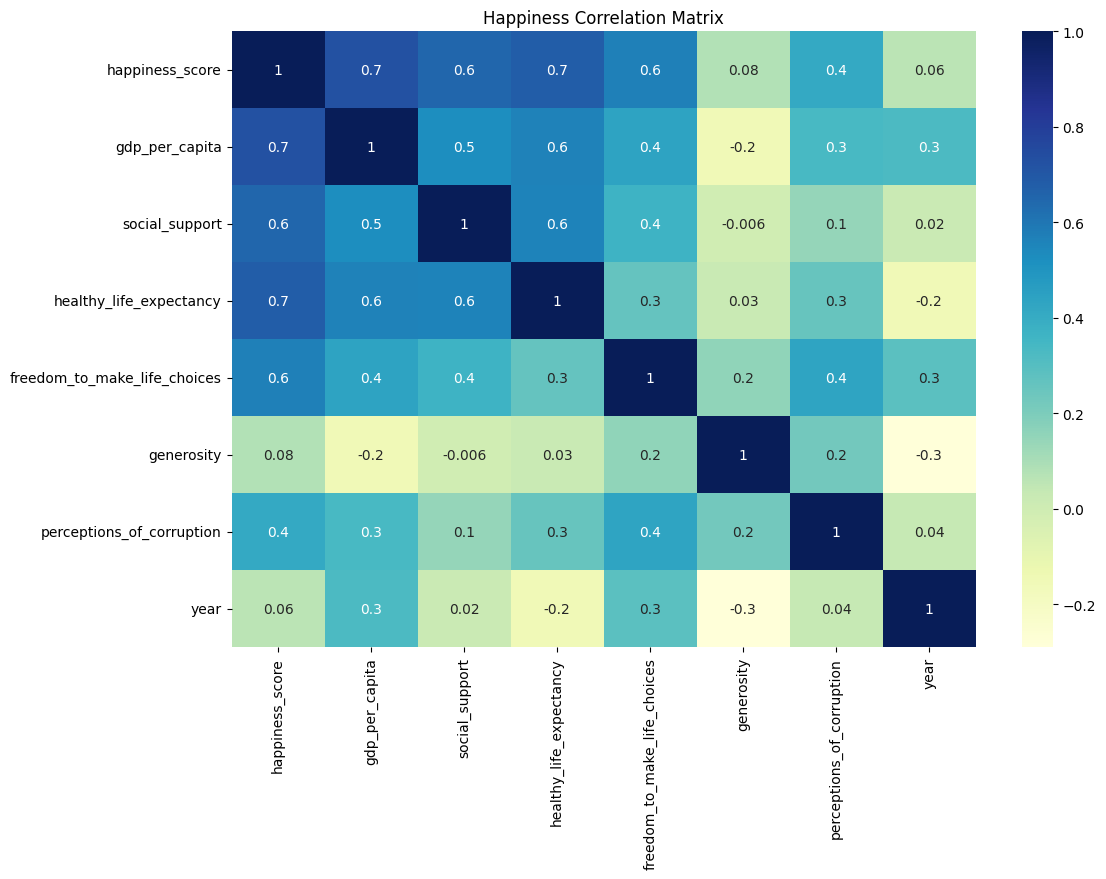

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".1g")
plt.title("Happiness Correlation Matrix")
plt.show()

As can be seen from the heatmap, there are strong positive correlations between hapiness_scores and gdp_per_capita and healthy_life_expectancy.

Now, let's explore the second dataset. We need to read the Sustainable Development data first

In [ ]:
#Iterate over the directory tree and print the full path of each file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data set for python project/sustainable development data 2015-2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # Print the full path of each file by joining the directory and filename

/content/drive/MyDrive/data set for python project/sustainable development data 2015-2023/sustainable_development_report_2023.csv
/content/drive/MyDrive/data set for python project/sustainable development data 2015-2023/sdg_index_2000-2022.csv


There are two directory paths for two data sets that I need to use.I will read each dataset and see how their appearance looks like.

In [ ]:
SDD1 = pd.read_csv('/content/drive/MyDrive/data set for python project/sustainable development data 2015-2023/sustainable_development_report_2023.csv')
SDD1

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.3276,...,86.789000,95.995714,98.4685,91.233750,60.059571,68.793667,87.928000,85.0700,92.521091,75.601000
1,SWE,Sweden,OECD,85.981397,98.8885,63.074125,96.904000,99.761667,91.44025,95.0576,...,84.966429,97.586286,94.9650,90.389250,56.830571,70.031000,69.348667,80.1882,88.508455,85.770250
2,DNK,Denmark,OECD,85.683637,99.2155,71.025250,95.398500,99.339667,86.99800,90.7316,...,87.562429,96.984857,98.1560,93.038500,44.571714,60.780667,76.303333,92.7924,93.844909,82.148000
3,DEU,Germany,OECD,83.358447,99.5105,72.366000,93.039357,97.162667,81.92025,88.4434,...,86.967286,95.788429,88.1470,90.096500,55.412857,64.002000,73.996000,79.2318,89.457545,84.390250
4,AUT,Austria,OECD,82.280189,99.4510,73.067500,92.468000,97.914333,84.57925,92.1636,...,83.274143,96.982143,94.6345,92.473667,49.623286,57.332000,NaN,73.5836,87.911455,71.130250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SOM,Somalia,Sub-Saharan Africa,48.027231,11.2740,27.306833,17.860923,55.639000,25.86100,49.3006,...,55.669500,5.599857,73.8030,69.417667,94.129000,99.925333,50.251200,53.3714,40.012200,43.725667
162,YEM,"Yemen, Rep.",MENA,46.846980,4.5525,28.769714,44.467429,41.766750,13.05475,36.2314,...,53.237800,14.223714,66.2925,52.952750,95.959143,98.667000,74.936667,48.3705,35.905714,50.094333
163,TCD,Chad,Sub-Saharan Africa,45.342321,25.4270,38.534714,27.061071,13.307750,30.83550,42.4036,...,64.424333,9.631571,63.0405,32.822250,90.994167,99.079000,NaN,76.1944,29.438000,52.594000
164,CAF,Central African Republic,Sub-Saharan Africa,40.395839,3.1820,36.468000,12.952714,19.305750,34.20075,40.4204,...,53.382333,7.064714,9.5775,21.898667,94.462143,99.463333,NaN,89.7172,42.332667,36.516750


In [ ]:
SDD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    object 
 1   country        166 non-null    object 
 2   region         166 non-null    object 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10  goal_7_score   166 non-null    float64
 11  goal_8_score   166 non-null    float64
 12  goal_9_score   166 non-null    float64
 13  goal_10_score  149 non-null    float64
 14  goal_11_score  166 non-null    float64
 15  goal_12_score  166 non-null    float64
 16  goal_13_score  166 non-null    float64
 17  goal_14_score  126 non-null    float64
 18  goal_15_sc

In [ ]:
SDD2 = pd.read_csv('/content/drive/MyDrive/data set for python project/sustainable development data 2015-2023/sdg_index_2000-2022.csv')
SDD2

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,...,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,Zimbabwe,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,...,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,ZWE,Zimbabwe,2020,54.3,20.1,47.2,41.5,62.0,77.0,51.1,...,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,ZWE,Zimbabwe,2021,54.8,20.8,48.4,41.9,62.5,77.1,51.1,...,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


In [ ]:
SDD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

I want to append these two datasets into a unified dataframe to examine the sustainable development indices of countries from 2000 to 2023. However, currently, the two datasets have some differences.

Specifically, the 'overall_score' column in SDD1 corresponds to the 'sdg_index_score' column in SDD2, and I need to rename it to a unified column name, 'overall_score.'

Additionally, the 'region' column in SDD1 is not present in SDD2. I will drop this column in SDD1 because I will merge these datasets with the World Happiness Report (WHR) data, and I will use the 'region' column from WHR.

Furthermore, SDD1 is missing the 'year' column, which represents the Sustainable Development data (abbreviated as SDD) for the year 2023. I will handle this by adding the 'year' column to SDD1.

Afterward, I will append SDD1 and SDD2 and sort them based on the country and the year.

In [ ]:
# Rename column
SDD2.rename({'sdg_index_score':'overall_score'}, axis = 1, inplace = True)

# Drop the column region from SDD1
SDD1.drop('region', axis=1, inplace=True)

# Create a new column
new_column_name = 'year'
new_column_value = 2023

# Specify the specific position(before column 'overall_score')
position = SDD1.columns.get_loc('overall_score')

# Insert new column
SDD1.insert(position, new_column_name, new_column_value)

# Append two DataFrames
appended_data = pd.concat([SDD1, SDD2], ignore_index=True)

# Only keep rows with data from 2015 to 2023
appended_data = appended_data[(appended_data['year'] >= 2015) & (appended_data['year'] <= 2023)]

# Sort the resulting DataFrame by the 'country' and 'year' column
SDD = appended_data.sort_values(by=['country','year']).reset_index(drop=True)

# Print the result
SDD


,country_code,country,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2015,41.600000,30.100,45.000,33.400000,17.500,22.4000,44.1000,...,39.100000,6.400,0.000,31.30000,96.600000,99.100,0.0,53.0000,44.300000,35.500
1,AFG,Afghanistan,2016,44.700000,29.800,44.300,34.400000,37.400,24.8000,45.4000,...,38.500000,8.000,0.000,36.00000,96.500000,99.200,0.0,56.5000,45.700000,38.200
2,AFG,Afghanistan,2017,45.600000,29.600,43.500,35.100000,38.900,27.1000,46.6000,...,39.900000,8.800,0.000,33.60000,96.600000,99.100,0.0,60.9000,45.500000,40.100
3,AFG,Afghanistan,2018,46.300000,29.100,47.800,36.900000,40.200,29.0000,47.9000,...,40.800000,9.500,0.000,32.80000,96.700000,99.000,0.0,60.9000,45.600000,42.100
4,AFG,Afghanistan,2019,46.400000,29.400,47.000,36.500000,42.000,30.8000,49.2000,...,40.600000,9.700,0.000,29.80000,96.700000,99.000,0.0,60.9000,46.100000,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,ZWE,Zimbabwe,2019,53.700000,21.400,46.000,40.600000,60.600,77.0000,51.3000,...,62.800000,23.800,24.000,58.60000,94.600000,94.200,0.0,76.4000,44.000000,44.500
1602,ZWE,Zimbabwe,2020,54.300000,20.100,47.200,41.500000,62.000,77.0000,51.1000,...,62.900000,25.400,24.000,60.00000,94.600000,94.300,0.0,76.4000,44.600000,46.000
1603,ZWE,Zimbabwe,2021,54.800000,20.800,48.400,41.900000,62.500,77.1000,51.1000,...,63.100000,27.000,24.000,61.20000,94.500000,94.300,0.0,77.9000,43.100000,48.100
1604,ZWE,Zimbabwe,2022,55.600000,21.500,48.500,41.900000,62.500,77.2000,51.1000,...,63.200000,27.000,24.000,65.70000,94.500000,94.300,0.0,77.9000,40.500000,47.800


 I will drop the 'country_code' column as I don't need it

In [ ]:
SDD.drop('country_code', axis=1, inplace=True)
SDD

,country,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,Afghanistan,2015,41.600000,30.100,45.000,33.400000,17.500,22.4000,44.1000,26.60000,39.100000,6.400,0.000,31.30000,96.600000,99.100,0.0,53.0000,44.300000,35.500
1,Afghanistan,2016,44.700000,29.800,44.300,34.400000,37.400,24.8000,45.4000,36.50000,38.500000,8.000,0.000,36.00000,96.500000,99.200,0.0,56.5000,45.700000,38.200
2,Afghanistan,2017,45.600000,29.600,43.500,35.100000,38.900,27.1000,46.6000,38.30000,39.900000,8.800,0.000,33.60000,96.600000,99.100,0.0,60.9000,45.500000,40.100
3,Afghanistan,2018,46.300000,29.100,47.800,36.900000,40.200,29.0000,47.9000,35.40000,40.800000,9.500,0.000,32.80000,96.700000,99.000,0.0,60.9000,45.600000,42.100
4,Afghanistan,2019,46.400000,29.400,47.000,36.500000,42.000,30.8000,49.2000,35.60000,40.600000,9.700,0.000,29.80000,96.700000,99.000,0.0,60.9000,46.100000,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Zimbabwe,2019,53.700000,21.400,46.000,40.600000,60.600,77.0000,51.3000,39.90000,62.800000,23.800,24.000,58.60000,94.600000,94.200,0.0,76.4000,44.000000,44.500
1602,Zimbabwe,2020,54.300000,20.100,47.200,41.500000,62.000,77.0000,51.1000,41.60000,62.900000,25.400,24.000,60.00000,94.600000,94.300,0.0,76.4000,44.600000,46.000
1603,Zimbabwe,2021,54.800000,20.800,48.400,41.900000,62.500,77.1000,51.1000,41.60000,63.100000,27.000,24.000,61.20000,94.500000,94.300,0.0,77.9000,43.100000,48.100
1604,Zimbabwe,2022,55.600000,21.500,48.500,41.900000,62.500,77.2000,51.1000,41.60000,63.200000,27.000,24.000,65.70000,94.500000,94.300,0.0,77.9000,40.500000,47.800


In [ ]:
SDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1606 non-null   object 
 1   year           1606 non-null   int64  
 2   overall_score  1606 non-null   float64
 3   goal_1_score   1591 non-null   float64
 4   goal_2_score   1606 non-null   float64
 5   goal_3_score   1606 non-null   float64
 6   goal_4_score   1606 non-null   float64
 7   goal_5_score   1606 non-null   float64
 8   goal_6_score   1606 non-null   float64
 9   goal_7_score   1606 non-null   float64
 10  goal_8_score   1606 non-null   float64
 11  goal_9_score   1606 non-null   float64
 12  goal_10_score  1589 non-null   float64
 13  goal_11_score  1606 non-null   float64
 14  goal_12_score  1606 non-null   float64
 15  goal_13_score  1606 non-null   float64
 16  goal_14_score  1566 non-null   float64
 17  goal_15_score  1606 non-null   float64
 18  goal_16_

In [ ]:
SDD.head()

,country,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,Afghanistan,2015,41.6,30.1,45.0,33.4,17.5,22.4,44.1,26.6,39.1,6.4,0.0,31.3,96.6,99.1,0.0,53.0,44.3,35.5
1,Afghanistan,2016,44.7,29.8,44.3,34.4,37.4,24.8,45.4,36.5,38.5,8.0,0.0,36.0,96.5,99.2,0.0,56.5,45.7,38.2
2,Afghanistan,2017,45.6,29.6,43.5,35.1,38.9,27.1,46.6,38.3,39.9,8.8,0.0,33.6,96.6,99.1,0.0,60.9,45.5,40.1
3,Afghanistan,2018,46.3,29.1,47.8,36.9,40.2,29.0,47.9,35.4,40.8,9.5,0.0,32.8,96.7,99.0,0.0,60.9,45.6,42.1
4,Afghanistan,2019,46.4,29.4,47.0,36.5,42.0,30.8,49.2,35.6,40.6,9.7,0.0,29.8,96.7,99.0,0.0,60.9,46.1,42.0


In [ ]:
SDD.tail()

,country,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
1601,Zimbabwe,2019,53.700000,21.400,46.000,40.600000,60.600,77.0000,51.3000,39.90000,62.800000,23.800,24.000,58.60000,94.600000,94.200,0.0,76.4000,44.000000,44.500
1602,Zimbabwe,2020,54.300000,20.100,47.200,41.500000,62.000,77.0000,51.1000,41.60000,62.900000,25.400,24.000,60.00000,94.600000,94.300,0.0,76.4000,44.600000,46.000
1603,Zimbabwe,2021,54.800000,20.800,48.400,41.900000,62.500,77.1000,51.1000,41.60000,63.100000,27.000,24.000,61.20000,94.500000,94.300,0.0,77.9000,43.100000,48.100
1604,Zimbabwe,2022,55.600000,21.500,48.500,41.900000,62.500,77.2000,51.1000,41.60000,63.200000,27.000,24.000,65.70000,94.500000,94.300,0.0,77.9000,40.500000,47.800
1605,Zimbabwe,2023,55.602292,21.453,48.491,41.907714,62.497,77.1775,51.0746,41.62825,63.164714,26.964,23.981,65.65425,94.504286,94.256,NaN,77.8926,40.477455,47.781


In [ ]:
# Check Null values
SDD.isnull().sum()

country           0
year              0
overall_score     0
goal_1_score     15
goal_2_score      0
goal_3_score      0
goal_4_score      0
goal_5_score      0
goal_6_score      0
goal_7_score      0
goal_8_score      0
goal_9_score      0
goal_10_score    17
goal_11_score     0
goal_12_score     0
goal_13_score     0
goal_14_score    40
goal_15_score     0
goal_16_score     0
goal_17_score     0
dtype: int64

Let's check how many countries have fewer than 9 records

In [ ]:
filtered_countries_SDD= SDD[SDD.groupby('country')['country'].transform('count') < 9]
country_counts_SDD = filtered_countries_SDD['country'].value_counts()
print(country_counts_SDD)

# Print the number of countries with fewer than 9 records
total_unique_countries_SDD = filtered_countries_SDD["country"].nunique()
print(f'Total unique countries with fewer than 9 records: {total_unique_countries_SDD}')

# Print the number of records for those countries
total_count_SDD = filtered_countries_SDD['country'].count()
print(f"Total count of records for countries with fewer than 9 records: {total_count_SDD}")

#Print missing rows need to be filled
missing_rows_SDD = (9 * total_unique_countries_SDD - total_count_SDD)
print(f'Total missing rows for countries: {missing_rows_SDD}')

East and South Asia                8
Eastern Europe and Central Asia    8
High-income Countries              8
Latin America and the Caribbean    8
Low-income Countries               8
Lower & Lower-middle Income        8
Lower-middle-income Countries      8
Middle East and North Africa       8
OECD members                       8
Oceania                            8
Small Island Developing States     8
Sub-Saharan Africa                 8
Upper-middle-income Countries      8
World                              8
Name: country, dtype: int64
Total unique countries with fewer than 9 records: 14
Total count of records for countries with fewer than 9 records: 112
Total missing rows for countries: 14


In [ ]:
SDD.shape

(1606, 20)

Let's inspect the distribution of numerical variables.

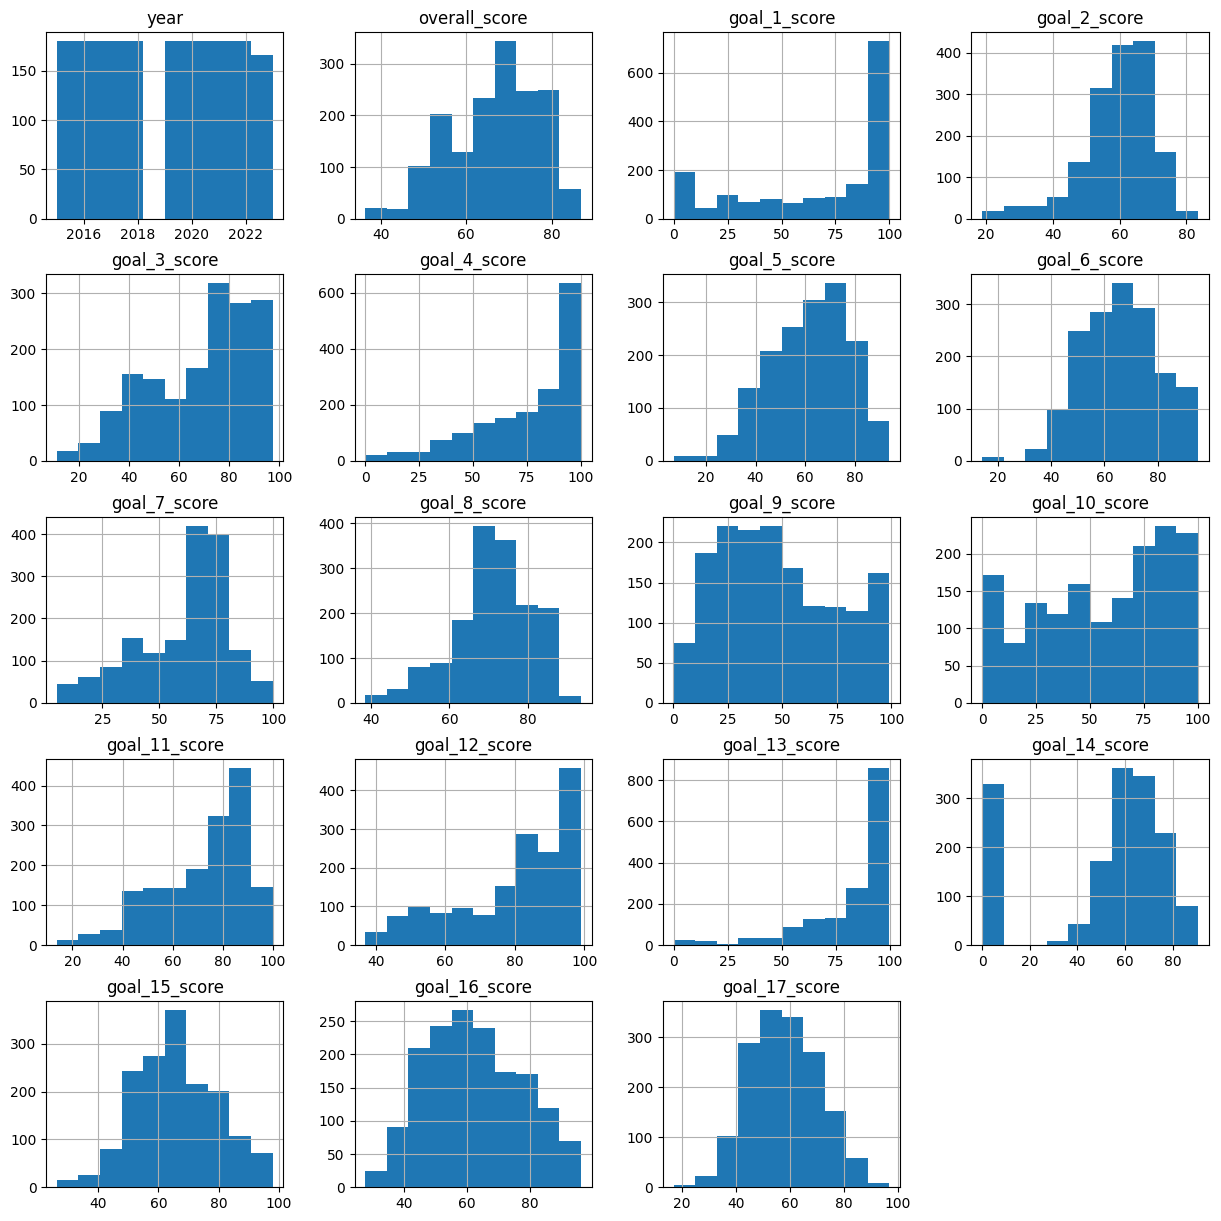

In [ ]:
# Check histogram of the dataframe
SDD.hist(figsize=(15,15))
plt.show()

The histograms show us that some variables follow normal distribution, for example overall_score, goal_5_score, goal_6_score, goal_8_score, goal_15_score, goal_16_score, goal_17-score, while some are left skewed, such as goal_1_score, goal_2_score, goal_3_score, goal_4_score, goal_7_score, goal_11_score, goal_12_score, goal_13_core.There is also a variables are right skewed, namely goal_9_score. Some of variables have unusual data as year, goal_10_score and goal_14_score. We will process these values later before using them for the model.



In [ ]:
#check duplicate record using check duplicate function for WHR
duplicate_records_SDD = check_duplicate_records(SDD)

# Print the result
print(duplicate_records_SDD)

Empty DataFrame
Columns: [country, year, record_count]
Index: []


There is no duplicated records for this data

Let's inspect some basic statistic information of the SDD

In [ ]:
SDD.describe()

,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,1606.000000,1606.000000,1591.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1589.000000,1606.000000,1606.000000,1606.000000,1566.000000,1606.000000,1606.000000,1606.000000
mean,2018.965131,66.525259,68.213761,59.350094,68.848018,75.787393,61.529502,65.900799,60.705951,71.228074,47.881574,55.975812,71.899230,79.826463,82.325229,51.078011,66.065269,62.277773,57.888169
std,2.566747,10.359843,35.446364,10.696644,20.392871,23.603338,16.022448,14.459062,20.203333,10.055472,26.444251,30.768997,17.974281,16.243126,20.804384,28.084443,13.838680,14.938425,12.920885
min,2015.000000,36.400000,0.000000,18.800000,11.100000,0.000000,7.000000,14.000000,5.000000,38.500000,0.200000,0.000000,13.800000,37.000000,0.000000,0.000000,26.300000,27.900000,16.900000
25%,2017.000000,59.125000,39.650000,54.100000,51.625000,60.800000,49.900000,55.000000,46.600000,66.000000,26.000000,31.700000,58.825000,70.400000,73.800000,46.900000,55.900000,51.100000,48.500000
50%,2019.000000,68.300000,85.200000,60.800000,74.900000,84.050000,64.000000,66.750000,67.150000,71.700000,44.000000,61.805500,76.500000,84.750000,90.863500,61.700000,65.900000,61.200000,57.550000
75%,2021.000000,74.375000,98.715500,66.400000,84.600000,95.600000,73.700000,75.700000,74.000000,78.200000,69.000000,81.400000,86.100000,93.900000,96.875000,70.100000,74.875000,73.900000,67.300000
max,2023.000000,86.800000,100.000000,83.401125,97.300000,100.000000,94.021667,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.925333,90.600000,97.900000,96.000000,96.800000


The table shows that variables are of different ranges.Let's draw boxplots to inspect the range of the data and anomalies.

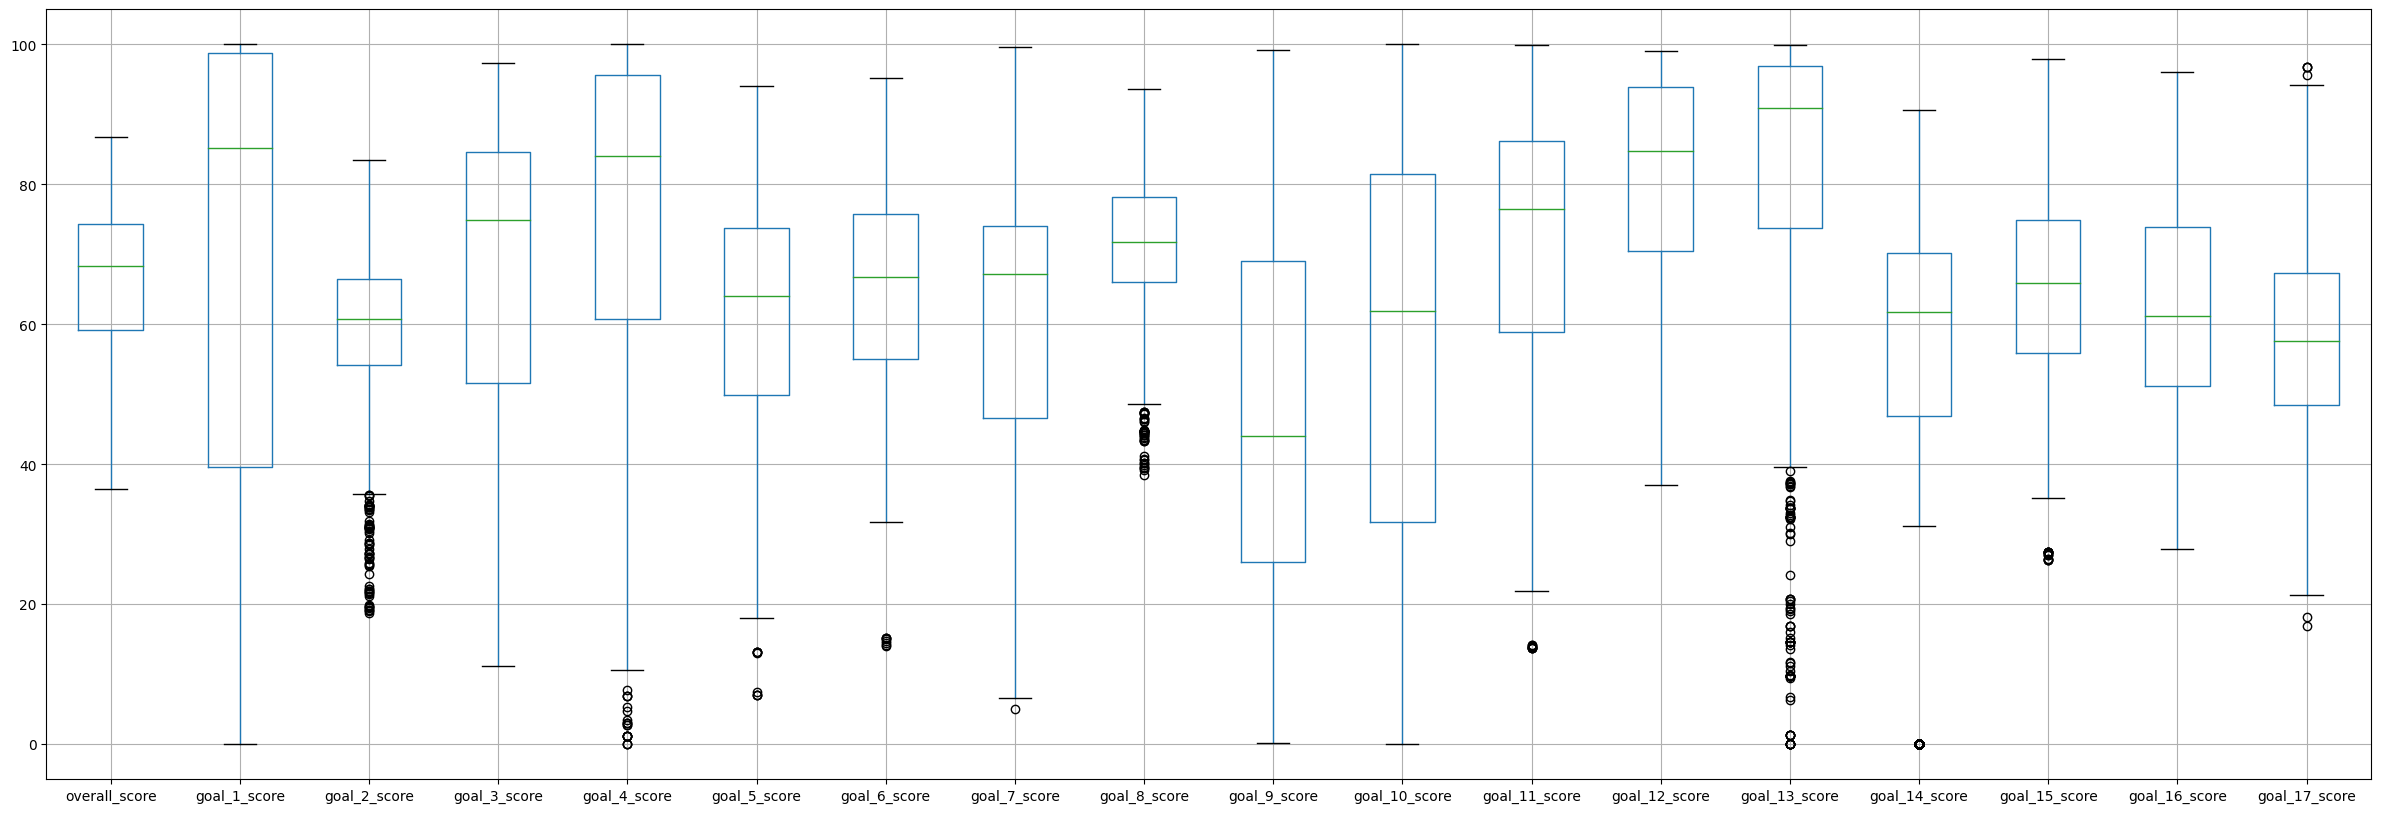

In [ ]:
numerical_columns_SDD = SDD.select_dtypes(include=['number']).drop(['year'], axis=1)
numerical_columns_SDD.boxplot(figsize=(30, 10))
plt.show()

The boxplots reveal a great number of outliers in goal_2_score,goal_4_score, goal_8_score and goal_13_score. We can also consider outliers in goal_14_score

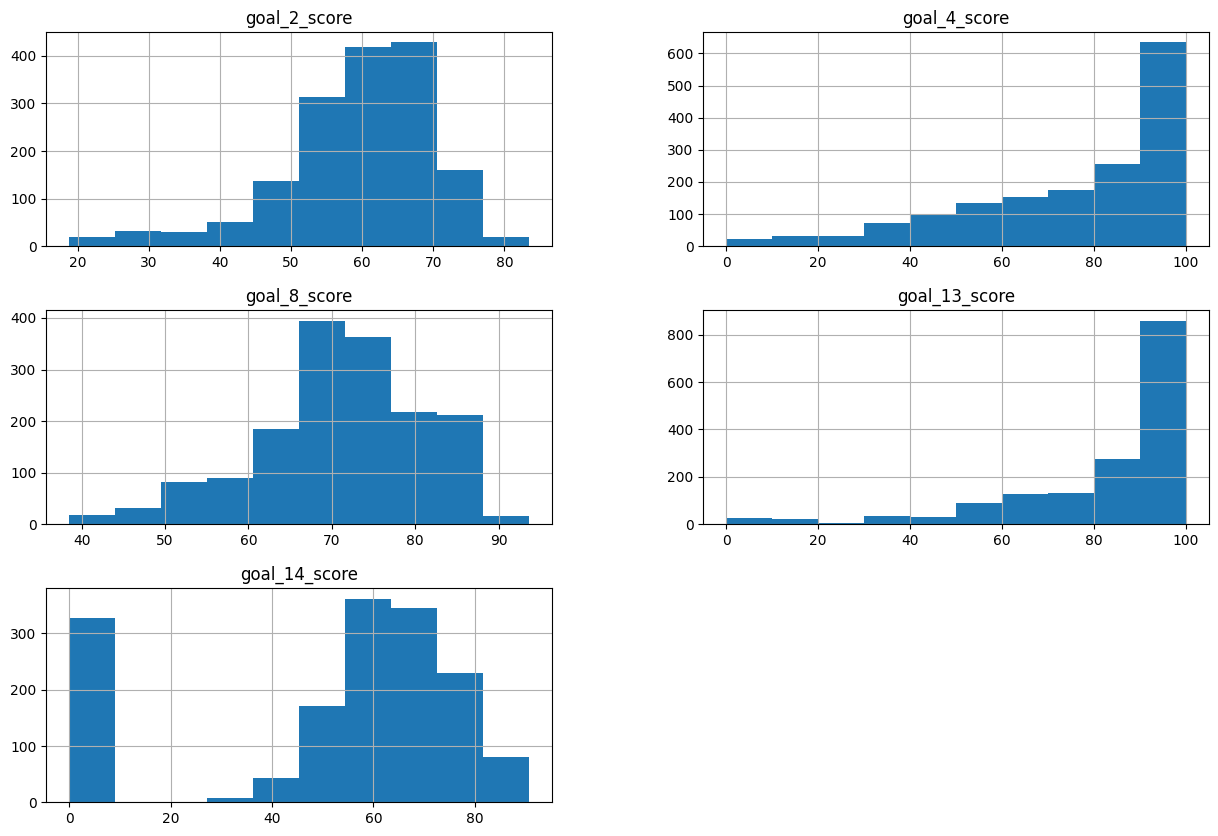

In [ ]:
outlier_SDD = ['goal_2_score','goal_4_score','goal_8_score', 'goal_13_score', 'goal_14_score']
SDD[outlier_SDD].hist(bins=10, figsize=(15,10))
plt.show()

We can see that the distribution of goal_4_score and goal_13_score variables are highly skewed. goal_14_score have unsual distribution and need to be taken care of.

Let's draw a heatmap to see the correlation between variables

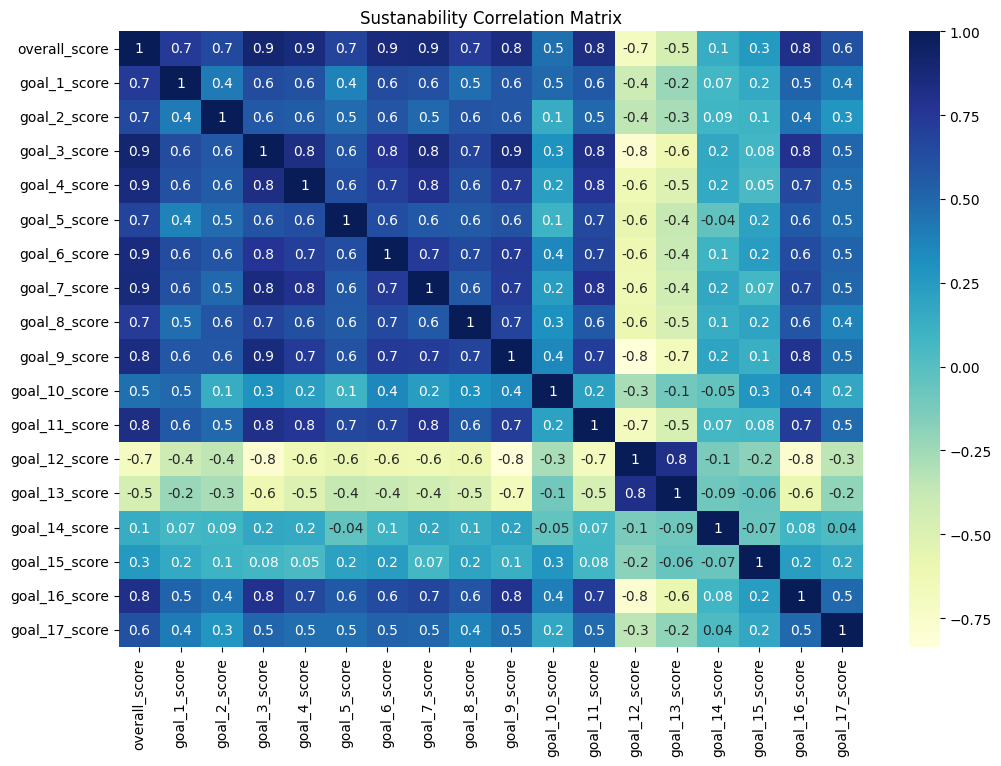

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns_SDD.corr(), annot=True, cmap="YlGnBu", fmt=".1g")
plt.title("Sustanability Correlation Matrix")
plt.show()

The heatmap chart illustrates a positive correlation between overall_score and most variables. However, there is a negative correlation with goal_12_score, goal_13_score, and no clear correlation with goal_10_score, goal_14_score, goal_15_score and goal_17_score.

#II. DATA PREPROCESSING

##1. Data cleaning
In the data cleaning task, we will come to remove outliers and deal with missing values.

In this case, we will remove the outliers that initially detected in the boxplots. To determine whether a datapoint is outlier or not, we will calculate the interquartile method.

An interquartile will be calculated by the formula: IQR = Q3 - Q1

We start with the WHR data first

### Remove outliers

We start with the df first

In [ ]:
IQR_o = df[outlier].quantile(0.75) - df[outlier].quantile(0.25)
print(IQR_o)

generosity                   0.137858
perceptions_of_corruption    0.109119
dtype: float64


We then iterately compute the upper bound and lower bound of each variable.

In [ ]:
# Let's find outliers values of generosity
upb_g = round(df['generosity'].quantile(0.25) - 1.5*IQR_o[0], 3)
lob_g = round(df['generosity'].quantile(0.75) + 1.5*IQR_o[0], 3)
print('Upper bound is:', upb_g)
print('Lower bound is:', lob_g)

Upper bound is: -0.092
Lower bound is: 0.46


In [ ]:
# Let's find outliers values of perceptions_of_corruption
upb_pofc = round(df['perceptions_of_corruption'].quantile(0.25) - 1.5*IQR_o[1], 3)
lob_pofc = round(df['perceptions_of_corruption'].quantile(0.75) + 1.5*IQR_o[1], 3)
print('Upper bound is:', upb_pofc)
print('Lower bound is:', lob_pofc)

Upper bound is: -0.107
Lower bound is: 0.33


Let's look at the statistics of these variable again.

In [ ]:
df[outlier].describe()

,generosity,perceptions_of_corruption
count,1367.000000,1366.000000
mean,0.196260,0.132275
std,0.113301,0.112555
min,0.000000,0.000000
25%,0.115000,0.056826
50%,0.182700,0.097000
75%,0.252858,0.165945
max,0.838075,0.587000


As we can see:

The minimum of generosity is 0 and maximum is 0.838 , therefore, the outliers will be values that *>0.46*

The outliers in perceptions_of_corruption will be values that are *> 0.33*.

Let's come back to dataset and get rid of these values

In [ ]:
df = df[~((df['generosity'] > 0.46) | (df['perceptions_of_corruption'] > 0.33))]
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1212.000000,1212.000000,1212.000000,1211.000000,1212.000000,1212.000000,1211.000000,1212.000000
mean,5.322197,0.980186,1.029378,0.564784,0.434431,0.178380,0.105346,2018.934818
std,1.023624,0.431183,0.327791,0.242577,0.152257,0.093077,0.072648,2.536253
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.569500,0.678245,0.816500,0.382530,0.335643,0.107000,0.053426,2017.000000
50%,5.330000,1.017000,1.061270,0.597000,0.450001,0.171955,0.088000,2019.000000
75%,6.089250,1.285250,1.273887,0.748707,0.548655,0.238000,0.141225,2021.000000
max,7.561000,2.096000,1.644000,1.122000,0.768000,0.459010,0.329570,2023.000000


In [ ]:
df[outlier].describe()

,generosity,perceptions_of_corruption
count,1212.000000,1211.000000
mean,0.178380,0.105346
std,0.093077,0.072648
min,0.000000,0.000000
25%,0.107000,0.053426
50%,0.171955,0.088000
75%,0.238000,0.141225
max,0.459010,0.329570


Now that the statitics have changed, let's see if we finally get rid of the outliers.

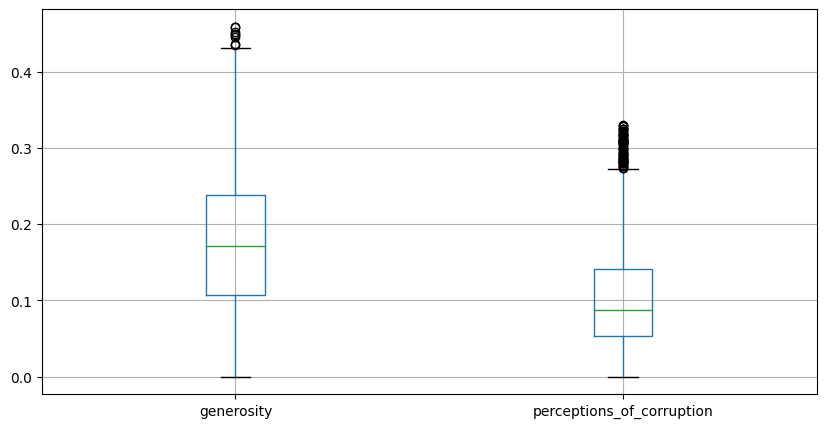

In [ ]:
df[outlier].boxplot(figsize = (10,5))
plt.show()

We can still spot some outliers here, but not many. Because after removing outliers, the statistics values of the dataset will change. In this case we are using interquartile (IQR), which means we are using median values. The median values will change a little and not much affected by the removed outliers. That's why the new range, in other words, upper bound and lower bound will slightly change.

Now, let's inspect dataframe 2 which is SDD.

In [ ]:
#Calculate interquartile
IQR_o_SDD= SDD[outlier_SDD].quantile(0.75) - SDD[outlier_SDD].quantile(0.25)
print(IQR_o_SDD)

goal_2_score     12.300
goal_4_score     34.800
goal_8_score     12.200
goal_13_score    23.075
goal_14_score    23.200
dtype: float64


We then iterately compute the upper bound and lower bound of each variable.

In [ ]:
# Let's find outliers values of goal_2_score
upb_2 = round(SDD['goal_2_score'].quantile(0.25) - 1.5*IQR_o_SDD[0], 3)
lob_2 = round(SDD['goal_2_score'].quantile(0.75) + 1.5*IQR_o_SDD[0], 3)
print('Upper bound is:', upb_2)
print('Lower bound is:', lob_2)


Upper bound is: 35.65
Lower bound is: 84.85


In [ ]:
# Let's find outliers values of goal_4_score
upb_4 = round(SDD['goal_4_score'].quantile(0.25) - 1.5*IQR_o_SDD[1], 3)
lob_4 = round(SDD['goal_4_score'].quantile(0.75) + 1.5*IQR_o_SDD[1], 3)
print('Upper bound is:', upb_4)
print('Lower bound is:', lob_4)

Upper bound is: 8.6
Lower bound is: 147.8


In [ ]:
# Let's find outliers values of goal_8_score
upb_8 = round(SDD['goal_8_score'].quantile(0.25) - 1.5*IQR_o_SDD[2], 3)
lob_8 = round(SDD['goal_8_score'].quantile(0.75) + 1.5*IQR_o_SDD[2], 3)
print('Upper bound is:', upb_8)
print('Lower bound is:', lob_8)

Upper bound is: 47.7
Lower bound is: 96.5


In [ ]:
# Let's find outliers values of goal_13_score
upb_13 = round(SDD['goal_13_score'].quantile(0.25) - 1.5*IQR_o_SDD[3], 3)
lob_13 = round(SDD['goal_13_score'].quantile(0.75) + 1.5*IQR_o_SDD[3], 3)
print('Upper bound is:', upb_13)
print('Lower bound is:', lob_13)

Upper bound is: 39.187
Lower bound is: 131.488


In [ ]:
# Let's find outliers values of goal_14_score
upb_14 = round(SDD['goal_14_score'].quantile(0.25) - 1.5*IQR_o_SDD[4], 3)
lob_14 = round(SDD['goal_14_score'].quantile(0.145) + 1.5*IQR_o_SDD[4], 3)
print('Upper bound is:', upb_14)
print('Lower bound is:', lob_14)

Upper bound is: 12.1
Lower bound is: 34.8


Let's look at the statistics of these variable again.

In [ ]:
SDD[outlier_SDD].describe()

,goal_2_score,goal_4_score,goal_8_score,goal_13_score,goal_14_score
count,1606.000000,1606.000000,1606.000000,1606.000000,1566.000000
mean,59.350094,75.787393,71.228074,82.325229,51.078011
std,10.696644,23.603338,10.055472,20.804384,28.084443
min,18.800000,0.000000,38.500000,0.000000,0.000000
25%,54.100000,60.800000,66.000000,73.800000,46.900000
50%,60.800000,84.050000,71.700000,90.863500,61.700000
75%,66.400000,95.600000,78.200000,96.875000,70.100000
max,83.401125,100.000000,93.600000,99.925333,90.600000


As we can see

The minimum of goal_2_score is 18.8 and maximum is 83.4, therefore, the outliers will be values that *<35.65*

Similarly, the outliers values in goal_4_score will be * <8.6*

The outliers in goal_8_score will be values that are *< 47.7

For goal_13_score, the outlier values will be *< 39.187*

And the outliers in goal_14_score will be *<12.1 and >34.8 *

Let's come back to our dataset and get rid of these values

In [ ]:
SDD_no_outliers = SDD[~((SDD['goal_2_score'] < 35.65)|
                          (SDD['goal_4_score'] < 8.6)|
                          (SDD['goal_8_score'] < 47.7)|
                          (SDD['goal_13_score'] < 39.187)|
                          (SDD['goal_17_score'] < 12.1)|
                          (SDD['goal_17_score'] > 34.8))]


In [ ]:
SDD_no_outliers.describe()

,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,22.000000,22.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2018.500000,59.230941,36.125286,57.963201,66.995249,65.216455,53.079273,53.222907,56.304515,61.448031,45.640659,41.725881,70.545818,74.091701,82.003561,64.717502,55.916500,48.567892,28.251227
std,2.650247,7.651054,46.219519,4.996066,20.378088,25.010767,14.486890,9.348744,17.468880,3.924133,22.317055,37.087729,22.992276,19.068918,13.824027,7.208789,11.331257,8.359557,4.819098
min,2015.000000,47.000000,0.000000,51.000000,33.200000,37.400000,34.500000,42.600000,24.800000,54.100000,7.300000,0.000000,32.500000,52.800000,63.200000,59.000000,41.900000,34.300000,16.900000
25%,2016.250000,54.300000,0.000000,52.800000,46.025000,44.425000,41.625000,48.800000,40.100000,59.100000,31.150000,0.000000,45.750000,52.902036,68.790500,59.425000,45.350000,40.025000,26.375000
50%,2018.000000,60.450000,5.500000,56.621571,78.200000,58.000000,44.985875,48.800000,61.900000,61.500000,50.800000,43.000000,75.400000,80.704643,86.350000,60.097417,57.022300,52.400000,29.375000
75%,2020.750000,66.975000,98.700000,63.400000,80.850000,98.600000,68.750000,64.900000,70.787500,64.575000,57.000000,84.400000,93.400000,92.450000,94.725000,65.800000,66.250000,54.300000,31.150000
max,2023.000000,68.000000,99.100000,63.500000,82.300000,99.617000,72.000000,66.300000,71.000000,66.500000,73.400000,84.443500,93.800000,97.700000,99.600000,77.900000,79.700000,56.500000,34.800000


In [ ]:
SDD_no_outliers[outlier_SDD].describe()

,goal_2_score,goal_4_score,goal_8_score,goal_13_score,goal_14_score
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,57.963201,65.216455,61.448031,82.003561,64.717502
std,4.996066,25.010767,3.924133,13.824027,7.208789
min,51.000000,37.400000,54.100000,63.200000,59.000000
25%,52.800000,44.425000,59.100000,68.790500,59.425000
50%,56.621571,58.000000,61.500000,86.350000,60.097417
75%,63.400000,98.600000,64.575000,94.725000,65.800000
max,63.500000,99.617000,66.500000,99.600000,77.900000


let's see if we finally get rid of the outliers.

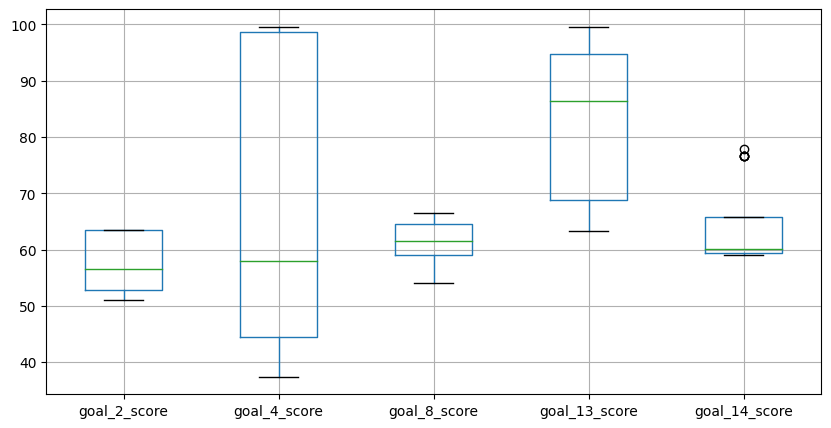

In [ ]:
SDD_no_outliers[outlier_SDD].boxplot(figsize = (10,5))
plt.show()

We can still spot some outliers in goal_14_score, but not many.

In [ ]:
SDD_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 81 to 1074
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        22 non-null     object 
 1   year           22 non-null     int64  
 2   overall_score  22 non-null     float64
 3   goal_1_score   21 non-null     float64
 4   goal_2_score   22 non-null     float64
 5   goal_3_score   22 non-null     float64
 6   goal_4_score   22 non-null     float64
 7   goal_5_score   22 non-null     float64
 8   goal_6_score   22 non-null     float64
 9   goal_7_score   22 non-null     float64
 10  goal_8_score   22 non-null     float64
 11  goal_9_score   22 non-null     float64
 12  goal_10_score  21 non-null     float64
 13  goal_11_score  22 non-null     float64
 14  goal_12_score  22 non-null     float64
 15  goal_13_score  22 non-null     float64
 16  goal_14_score  22 non-null     float64
 17  goal_15_score  22 non-null     float64
 18  goal_16_s

Because removing outliers results in the loss of too many values, impacting the accuracy of the data, we consider retaining them and keep using SDD data instead of SDD_no_outliers

### Deal with duplicate values

As we can see above, df data has duplicated values at country 'Cyprus'.
Since the values are relatively close to each other, we choose the option of removing the first row of data recorded in 2018 and 2019.

In [ ]:
df = df[df.duplicated(subset=['country', 'year'], keep='first')
      | ~df.duplicated(subset=['country', 'year'], keep=False)]

Let's check it again

In [ ]:
count_Cyprus = df[df['country'] == 'Cyprus']['country'].value_counts()
print('Number of records for Cyprus country:', count_Cyprus)

Number of records for Cyprus country: Cyprus    9
Name: country, dtype: int64


In [ ]:
df[df['country']=='Cyprus']

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
297,Cyprus,Western Europe,5.689,1.208130,0.893180,0.923560,0.406720,0.306380,0.061460,2015
298,Cyprus,Western Europe,5.546,1.318570,0.706970,0.848800,0.295070,0.279060,0.052280,2016
299,Cyprus,Western Europe,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,2017
301,Cyprus,Western Europe,5.762,1.229000,1.191000,0.909000,0.423000,0.202000,0.035000,2018
303,Cyprus,Western Europe,5.718,1.263000,1.252000,1.042000,0.417000,0.191000,0.162000,2019
304,Cyprus,Western Europe,6.159,1.212799,1.149171,1.026125,0.459386,0.227932,0.051207,2020
305,Cyprus,Western Europe,6.223,1.377000,0.765000,0.801000,0.464000,0.178000,0.061000,2021
306,Cyprus,Western Europe,6.221,1.815000,0.909000,0.819000,0.448000,0.123000,0.062000,2022
307,Cyprus,Western Europe,6.130,1.824000,1.224000,0.580000,0.455000,0.104000,0.050000,2023


### Fill missing values

Let's deal with NaN value of the data

It is easy to see that there is not much missing data in the WHR data. However, removing these rows would reduce the accuracy of the entire dataset. Therefore, I will choose to fill NaN values with the median of each column for each country across the years.

In [ ]:
#Fill null value by median of specific country over years
df['perceptions_of_corruption'] = df.groupby('country')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.median()))



df['healthy_life_expectancy'] = df.groupby('country')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.median()))




/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Let's check again

In [ ]:
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

Because there is a warning about an empty slice, filling NaN for the 'healthy_life_expectancy' column of the State of Palestine was unsuccessful. Some countries may not have data for certain years, let's check.

In [ ]:
df[df['healthy_life_expectancy'].isnull()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1149,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


Because there are no records recorded for the country 'State of Palestine' we will use the median value of the region 'Middle East and North Africa' to fill in the missing data.

In [ ]:
df['healthy_life_expectancy'] = df.groupby('region')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.median()))

Now we need to fill data for countries have fewer than 9 records

In [ ]:
def fill_missing_data(df):
    # Group by country and calculate median for numeric columns
    numeric_columns = ['happiness_score', 'gdp_per_capita', 'social_support',
                        'healthy_life_expectancy', 'freedom_to_make_life_choices',
                        'generosity', 'perceptions_of_corruption']
    df[numeric_columns] = df.groupby('country')[numeric_columns].transform(lambda x: x.fillna(x.median()))

    # Create a DataFrame with complete years from 2015 to 2023
    complete_years = pd.DataFrame({'year': range(2015, 2024)})

    # Iterate over countries
    for country, country_group in df.groupby('country'):
        # Check if there are missing years for the country
        missing_years = complete_years[~complete_years['year'].isin(country_group['year'])]

        if not missing_years.empty:
            # Create rows with missing years using the median values of numeric columns
            missing_data = pd.DataFrame({'country': country,
                                         'region': country_group['region'].mode().iloc[0],
                                         'year': missing_years['year'],
                                         'happiness_score': country_group['happiness_score'].median(),
                                         'gdp_per_capita': country_group['gdp_per_capita'].median(),
                                         'social_support': country_group['social_support'].median(),
                                         'healthy_life_expectancy': country_group['healthy_life_expectancy'].median(),
                                         'freedom_to_make_life_choices': country_group['freedom_to_make_life_choices'].median(),
                                         'generosity': country_group['generosity'].median(),
                                         'perceptions_of_corruption': country_group['perceptions_of_corruption'].median()})
            # Append the missing data to the original DataFrame
            df = pd.concat([df, missing_data], ignore_index=True)

    return df
# Fill data and sort values by column'country' and column 'year'
df_filled = fill_missing_data(df).sort_values(by=['country', 'year']).reset_index(drop=True)# set drop = True to emove the old index column
df_filled

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Afghanistan,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,2015
1,Afghanistan,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,2016
2,Afghanistan,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2017
3,Afghanistan,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018
4,Afghanistan,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019
...,...,...,...,...,...,...,...,...,...,...
1453,Zimbabwe,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019
1454,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020
1455,Zimbabwe,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000,2021
1456,Zimbabwe,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,2022


In [ ]:
#check again
filtered_countries_df = df_filled[df_filled.groupby('country')['country'].transform('count') == 9]
country_counts = filtered_countries_df['country'].value_counts()

#print number of country
print(f"Number of unique countries: {len(country_counts)}")

# Print number of country less than 9 records
countries_with_less_than_9_records = country_counts[country_counts < 9].index.tolist()
print(f"Countries with fewer than 9 records: {countries_with_less_than_9_records}")

Number of unique countries: 162
Countries with fewer than 9 records: []


In [ ]:
print (len(country_counts)*9)

1458


In [ ]:
df_filled.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

Now, the data has been filled and clean. Let's move to the SDD data

In [ ]:
SDD.isnull().sum()

country           0
year              0
overall_score     0
goal_1_score     15
goal_2_score      0
goal_3_score      0
goal_4_score      0
goal_5_score      0
goal_6_score      0
goal_7_score      0
goal_8_score      0
goal_9_score      0
goal_10_score    17
goal_11_score     0
goal_12_score     0
goal_13_score     0
goal_14_score    40
goal_15_score     0
goal_16_score     0
goal_17_score     0
dtype: int64

Fill countries have fewer than 9 records in SDD data

In [ ]:
def fill_missing_data_SDD(SDD):
    # Group by country and calculate median for numeric columns
    numeric_columns = ['overall_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score',
                       'goal_5_score','goal_6_score','goal_7_score', 'goal_8_score', 'goal_9_score',
                       'goal_10_score', 'goal_11_score','goal_12_score','goal_13_score','goal_14_score',
                       'goal_15_score','goal_16_score','goal_17_score']
    SDD[numeric_columns] = SDD.groupby('country')[numeric_columns].transform(lambda x: x.fillna(x.median()))

    # Create a DataFrame with complete years from 2015 to 2023
    complete_years = pd.DataFrame({'year': range(2015, 2024)})

    # Iterate over countries
    for country, country_group in SDD.groupby('country'):
        # Check if there are missing years for the country
        missing_years = complete_years[~complete_years['year'].isin(country_group['year'])]
        if not missing_years.empty:
            # Create rows with missing years using the median values of numeric columns
            missing_data = pd.DataFrame({'country': country,
                                         'year': missing_years['year'],
                                         'overall_score': country_group['overall_score'].median(),
                                         'goal_1_score': country_group['goal_1_score'].median(),
                                         'goal_2_score': country_group['goal_2_score'].median(),
                                         'goal_3_score': country_group['goal_3_score'].median(),
                                         'goal_4_score': country_group['goal_4_score'].median(),
                                         'goal_5_score': country_group['goal_5_score'].median(),
                                         'goal_6_score': country_group['goal_6_score'].median(),
                                         'goal_7_score': country_group['goal_7_score'].median(),
                                         'goal_8_score': country_group['goal_8_score'].median(),
                                         'goal_9_score': country_group['goal_9_score'].median(),
                                         'goal_10_score': country_group['goal_10_score'].median(),
                                         'goal_11_score': country_group['goal_11_score'].median(),
                                         'goal_12_score': country_group['goal_12_score'].median(),
                                         'goal_13_score': country_group['goal_13_score'].median(),
                                         'goal_14_score': country_group['goal_14_score'].median(),
                                         'goal_15_score': country_group['goal_15_score'].median(),
                                         'goal_16_score': country_group['goal_16_score'].median(),
                                         'goal_17_score': country_group['goal_17_score'].median()})
            # Append the missing data to the original DataFrame
            SDD = pd.concat([SDD, missing_data], ignore_index=True)

    return SDD
# Fill data and sort values by column'country' and column 'year'
SDD_filled = fill_missing_data_SDD(SDD).sort_values(by=['country', 'year']).reset_index(drop=True)# set drop = True to emove the old index column
SDD_filled

,country,year,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,Afghanistan,2015,41.600000,30.100,45.000,33.400000,17.500,22.4000,44.1000,26.60000,39.100000,6.400,0.000,31.30000,96.600000,99.100,0.0,53.0000,44.300000,35.500
1,Afghanistan,2016,44.700000,29.800,44.300,34.400000,37.400,24.8000,45.4000,36.50000,38.500000,8.000,0.000,36.00000,96.500000,99.200,0.0,56.5000,45.700000,38.200
2,Afghanistan,2017,45.600000,29.600,43.500,35.100000,38.900,27.1000,46.6000,38.30000,39.900000,8.800,0.000,33.60000,96.600000,99.100,0.0,60.9000,45.500000,40.100
3,Afghanistan,2018,46.300000,29.100,47.800,36.900000,40.200,29.0000,47.9000,35.40000,40.800000,9.500,0.000,32.80000,96.700000,99.000,0.0,60.9000,45.600000,42.100
4,Afghanistan,2019,46.400000,29.400,47.000,36.500000,42.000,30.8000,49.2000,35.60000,40.600000,9.700,0.000,29.80000,96.700000,99.000,0.0,60.9000,46.100000,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,Zimbabwe,2019,53.700000,21.400,46.000,40.600000,60.600,77.0000,51.3000,39.90000,62.800000,23.800,24.000,58.60000,94.600000,94.200,0.0,76.4000,44.000000,44.500
1616,Zimbabwe,2020,54.300000,20.100,47.200,41.500000,62.000,77.0000,51.1000,41.60000,62.900000,25.400,24.000,60.00000,94.600000,94.300,0.0,76.4000,44.600000,46.000
1617,Zimbabwe,2021,54.800000,20.800,48.400,41.900000,62.500,77.1000,51.1000,41.60000,63.100000,27.000,24.000,61.20000,94.500000,94.300,0.0,77.9000,43.100000,48.100
1618,Zimbabwe,2022,55.600000,21.500,48.500,41.900000,62.500,77.2000,51.1000,41.60000,63.200000,27.000,24.000,65.70000,94.500000,94.300,0.0,77.9000,40.500000,47.800


In [ ]:
SDD_filled.isnull().sum()

country          0
year             0
overall_score    0
goal_1_score     0
goal_2_score     0
goal_3_score     0
goal_4_score     0
goal_5_score     0
goal_6_score     0
goal_7_score     0
goal_8_score     0
goal_9_score     0
goal_10_score    0
goal_11_score    0
goal_12_score    0
goal_13_score    0
goal_14_score    0
goal_15_score    0
goal_16_score    0
goal_17_score    0
dtype: int64

In [ ]:
#check again
filtered_countries_SDD = SDD_filled[SDD_filled.groupby('country')['country'].transform('count') == 9]
country_counts_SDD = filtered_countries_SDD['country'].value_counts()

#print number of country
print(f"Number of unique countries: {len(country_counts_SDD)}")



Number of unique countries: 180


In [ ]:
print(len(country_counts_SDD)*9)

1620


Now the 2 need dataframe has been cleaned and ready for further exploration

###2. Data preprocessing

In [ ]:
# Merge or Concatenate DataFrames based on column 'country' and 'year'
merged_data = pd.merge(df_filled, SDD_filled, on=['country', 'year'], how='inner')
merged_data

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,Afghanistan,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,2015,...,39.100000,6.400,0.000,31.30000,96.600000,99.100,0.0,53.0000,44.300000,35.500
1,Afghanistan,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,2016,...,38.500000,8.000,0.000,36.00000,96.500000,99.200,0.0,56.5000,45.700000,38.200
2,Afghanistan,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2017,...,39.900000,8.800,0.000,33.60000,96.600000,99.100,0.0,60.9000,45.500000,40.100
3,Afghanistan,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018,...,40.800000,9.500,0.000,32.80000,96.700000,99.000,0.0,60.9000,45.600000,42.100
4,Afghanistan,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019,...,40.600000,9.700,0.000,29.80000,96.700000,99.000,0.0,60.9000,46.100000,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,Zimbabwe,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000,2019,...,62.800000,23.800,24.000,58.60000,94.600000,94.200,0.0,76.4000,44.000000,44.500
1211,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020,...,62.900000,25.400,24.000,60.00000,94.600000,94.300,0.0,76.4000,44.600000,46.000
1212,Zimbabwe,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000,2021,...,63.100000,27.000,24.000,61.20000,94.500000,94.300,0.0,77.9000,43.100000,48.100
1213,Zimbabwe,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000,2022,...,63.200000,27.000,24.000,65.70000,94.500000,94.300,0.0,77.9000,40.500000,47.800


#III. DATA VISUALIZATION

We will examine how the global happiness trend changes over the years.

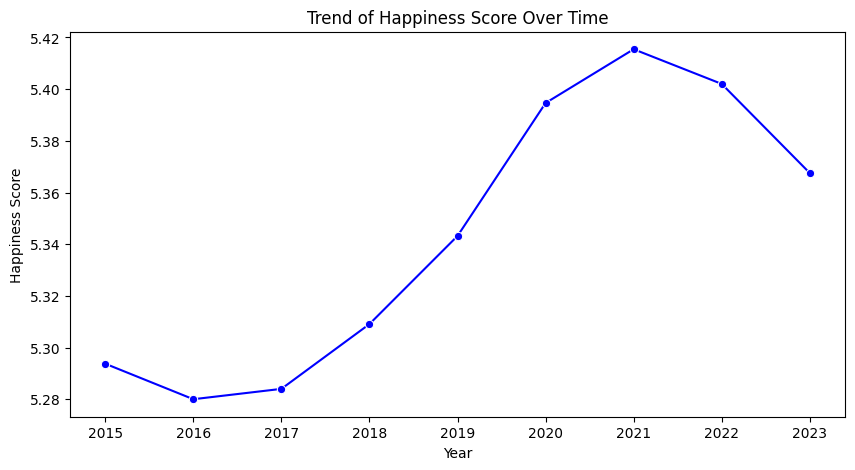

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Trend of Happiness Score Over Time')
sns.lineplot(data=df_filled, x='year', y='happiness_score', err_style=None, color='blue', linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

It can be observed that the overall global happiness trend has increased dramatically from 2015 to 2023, although there is a significant decrease from 2021 to 2023, it still remains at a high level. This may be attributed to the impact of factors such as the Covid-19 pandemic impact, significant fluctuations in the world's economy, politics, and society, which have greatly influenced the lives of people and the happiness levels of nations.Especially, the post-COVID pandemic situation, particularly the ongoing conflicts, contributes to increasing global political instability and significantly impacts the world economy.

Now, let's check the global sustainability trend over years

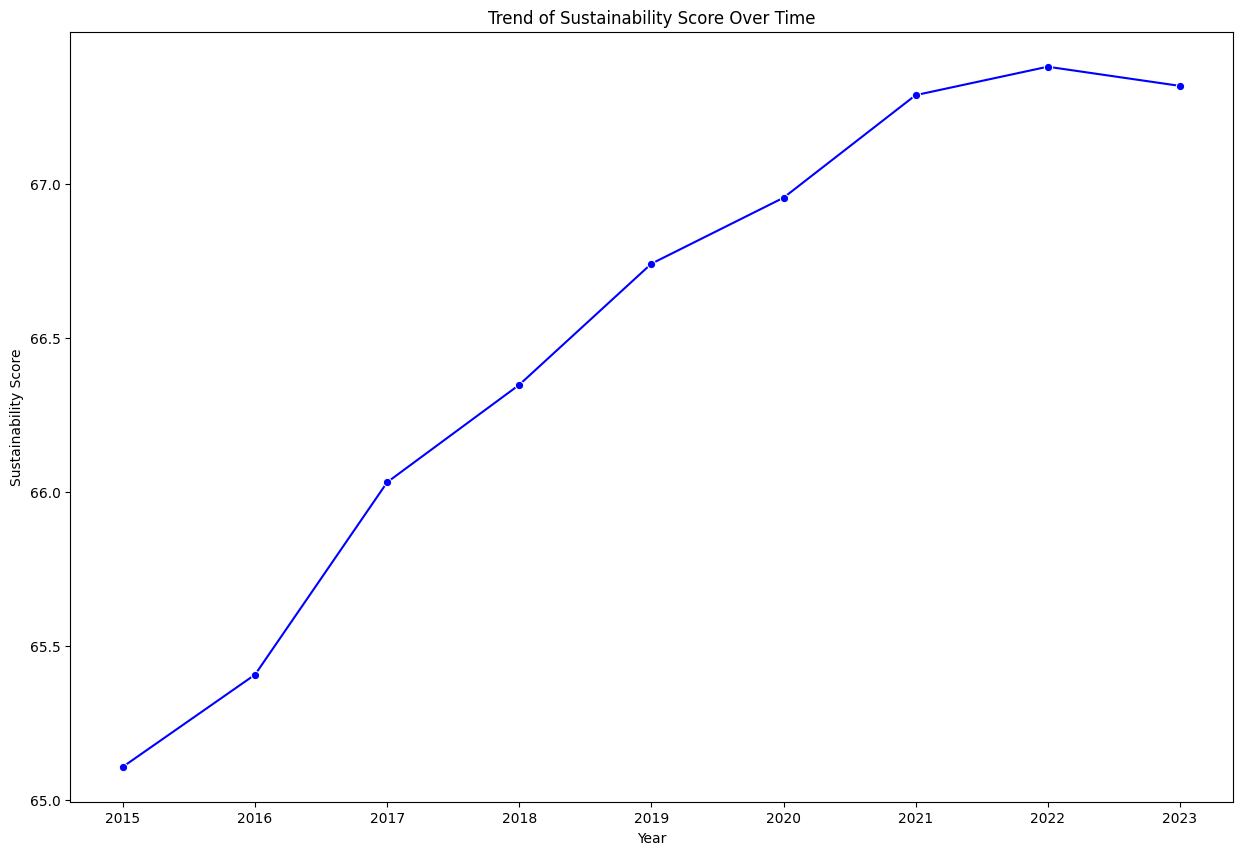

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Trend of Sustainability Score Over Time')
sns.lineplot(data=SDD_filled, x='year', y='overall_score', err_style=None, color='blue', linestyle='-', marker='o')
plt.xlabel('Year')
plt.ylabel('Sustainability Score')
plt.show()

We can observe that the overall trend has increased dramatically from 2015 to 2023, a slight decrease in global sustainability levels in 2018, followed by a sharp decline in 2022 and 2023, but gradually showing signs of recovery in the subsequent years. This can be partly attributed to the impact of post COVID-19. However, we will further explore the correlation between sustainability and happiness scores in the next steps

<ipython-input-78-125f93d4ca06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


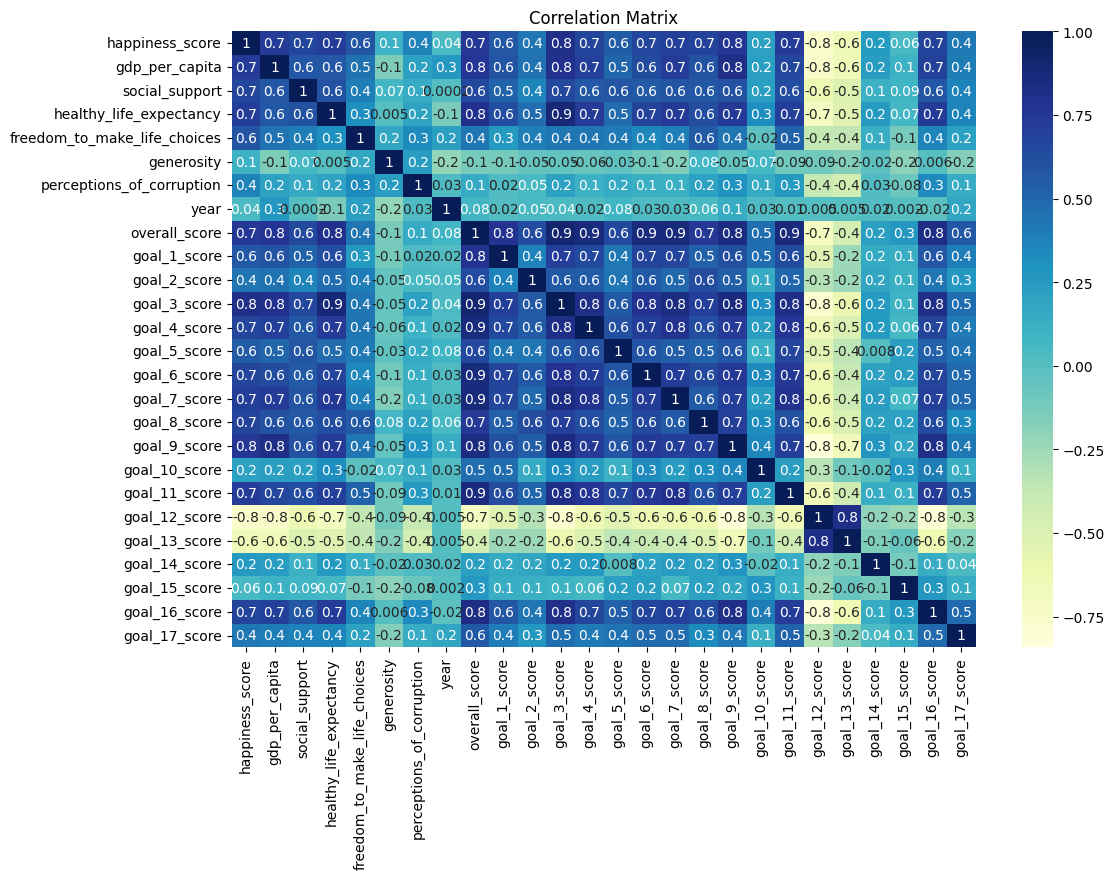

In [ ]:
# Correlation Matrix
correlation_matrix = merged_data.corr()

# Heatmap of Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".1g")
plt.title("Correlation Matrix")
plt.show()

It can be observed that goal_3_score and goal_9_score have the most positive correlation with the happiness score. If a country has a high score in the 'Good Health and Well-being' index or a high score in 'Industry, Innovation, and Infrastructure,' then the country tends to have a higher happiness index, and vice versa.

To analyze the relationship between sustainability scores and happiness scores across different regions, I use seaborn to create a scatter plot.

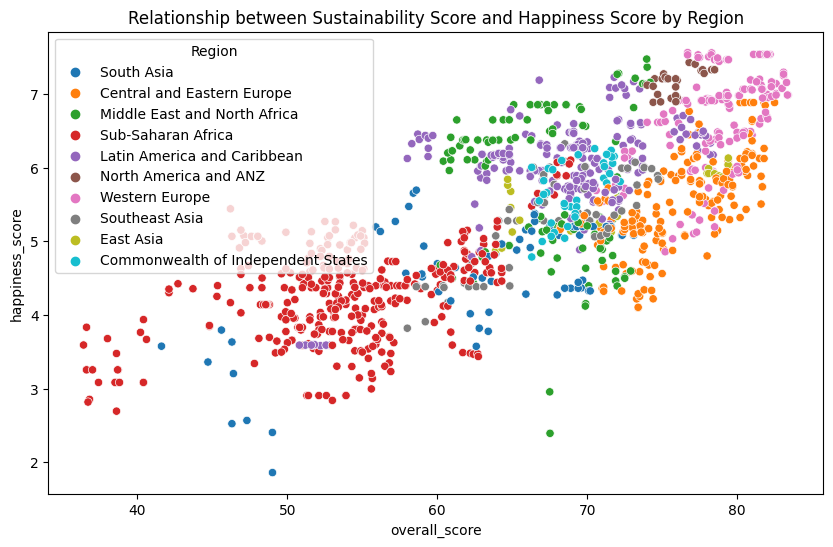

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= merged_data, x='overall_score', y='happiness_score', hue='region')

# Set title and axis labels
plt.title('Relationship between Sustainability Score and Happiness Score by Region')
plt.xlabel('overall_score')
plt.ylabel('happiness_score')

# Show the legend
plt.legend(title='Region')

# Display the plot
plt.show()

The general trend is that countries with high sustainability scores tend to have high happiness scores and vice versa. However, there is dispersion among countries within the same region as South Asia and Sub - Sarahan Africa, indicating that various factors influence the relationship between sustainability and happiness. It can be determined whether there is any region that exhibits a higher common trend compared to other regions, specifically the Western Europe, Central and Eastern Europe,North America and ANZ.



In [ ]:
# Calculate average happiness score for each country
avg_happiness = merged_data.groupby('country')['happiness_score'].mean()

# Calculate average sustainability score for each country
avg_sustainability = merged_data.groupby('country')['overall_score'].mean()

# Create a DataFrame with average scores
avg_scores_df = pd.DataFrame({'avg_happiness_score': avg_happiness, 'avg_sustainability_score': avg_sustainability})

# Sort the DataFrame by happiness score and sustainability score in descending order
sorted_df = avg_scores_df.sort_values(by=['avg_happiness_score', 'avg_sustainability_score'], ascending=False)

# Display the sorted DataFrame
print(sorted_df)

                          avg_happiness_score  avg_sustainability_score
country                                                                
Norway                               7.537000                 81.767165
Iceland                              7.528389                 77.629605
Netherlands                          7.464500                 78.991243
Canada                               7.340556                 77.866309
Israel                               7.203733                 73.352260
...                                       ...                       ...
Tanzania                             3.536133                 56.570327
South Sudan                          3.262511                 37.119565
Burundi                              3.195033                 52.656830
Central African Republic             3.149433                 38.810649
Afghanistan                          2.990767                 46.245067

[135 rows x 2 columns]


Let's see the top 5 highest and lowest happiness score and sustainable score countries

In [ ]:
# Select the top 5 unique countries with the highest scores
top_5_highest_countries = sorted_df.head(5)
top_5_highest_countries.reset_index(drop= False, inplace=True)


# Select the top 5 unique countries with the lowest scores
top_5_lowest_countries = sorted_df.tail(5)
top_5_lowest_countries.reset_index(drop= False, inplace=True)


<ipython-input-82-1b655d23a157>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='Score', hue='Score Type', data=melted_combined, ci=None)


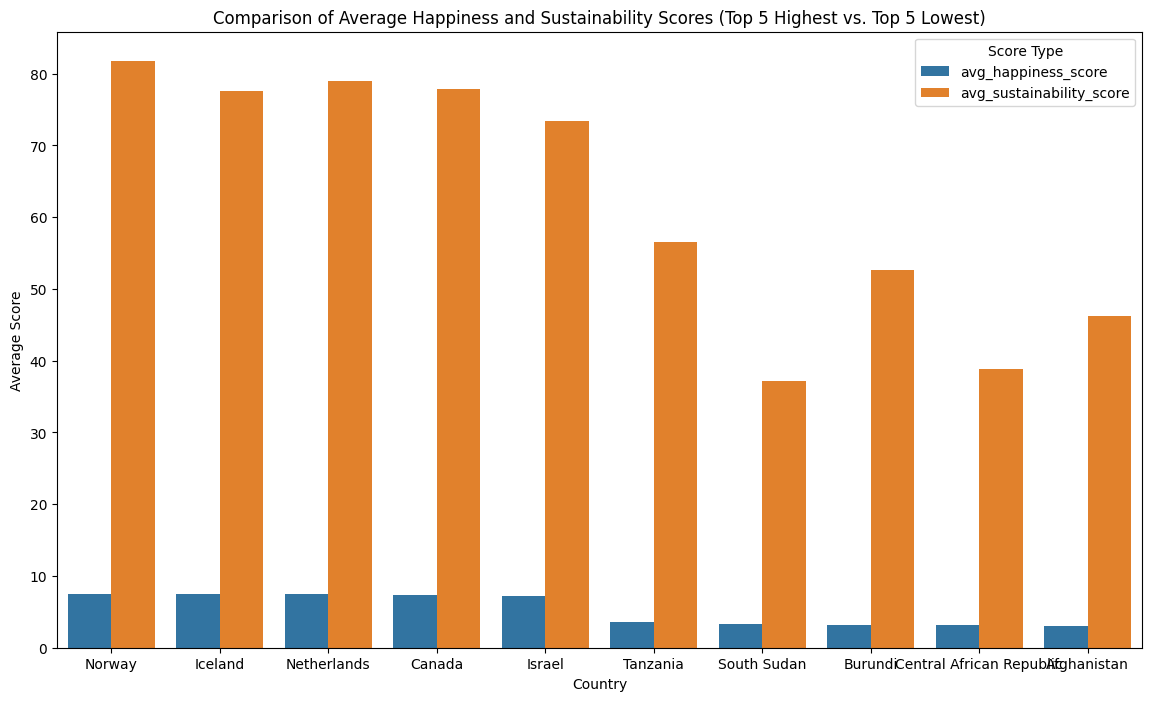

In [ ]:
# Melt the DataFrames for both top 5 highest and lowest countries
melted_top_5_highest = pd.melt(top_5_highest_countries, id_vars=['country'], value_vars=['avg_happiness_score', 'avg_sustainability_score'],
                                var_name='Score Type', value_name='Score')

melted_top_5_lowest = pd.melt(top_5_lowest_countries, id_vars=['country'], value_vars=['avg_happiness_score', 'avg_sustainability_score'],
                               var_name='Score Type', value_name='Score')

# Combine the melted DataFrames
melted_combined = pd.concat([melted_top_5_highest, melted_top_5_lowest])

# Plot a grouped bar chart for both top 5 highest and lowest countries
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='Score', hue='Score Type', data=melted_combined, ci=None)

# Set labels and title
plt.title('Comparison of Average Happiness and Sustainability Scores (Top 5 Highest vs. Top 5 Lowest)')
plt.xlabel('Country')
plt.ylabel('Average Score')

# Show the plot
plt.show()

We can observe that the sustainability scores of the top 5 countries are roughly double to nearly 1.5 times higher than those of the bottom 5 countries. Similarly, the happiness scores of the highest-ranking countries are also higher than those of the lowest-ranking countries at that level. Therefore, there seems to be a close correlation between these two metrics, suggesting a strong relationship between sustainability and happiness scores.

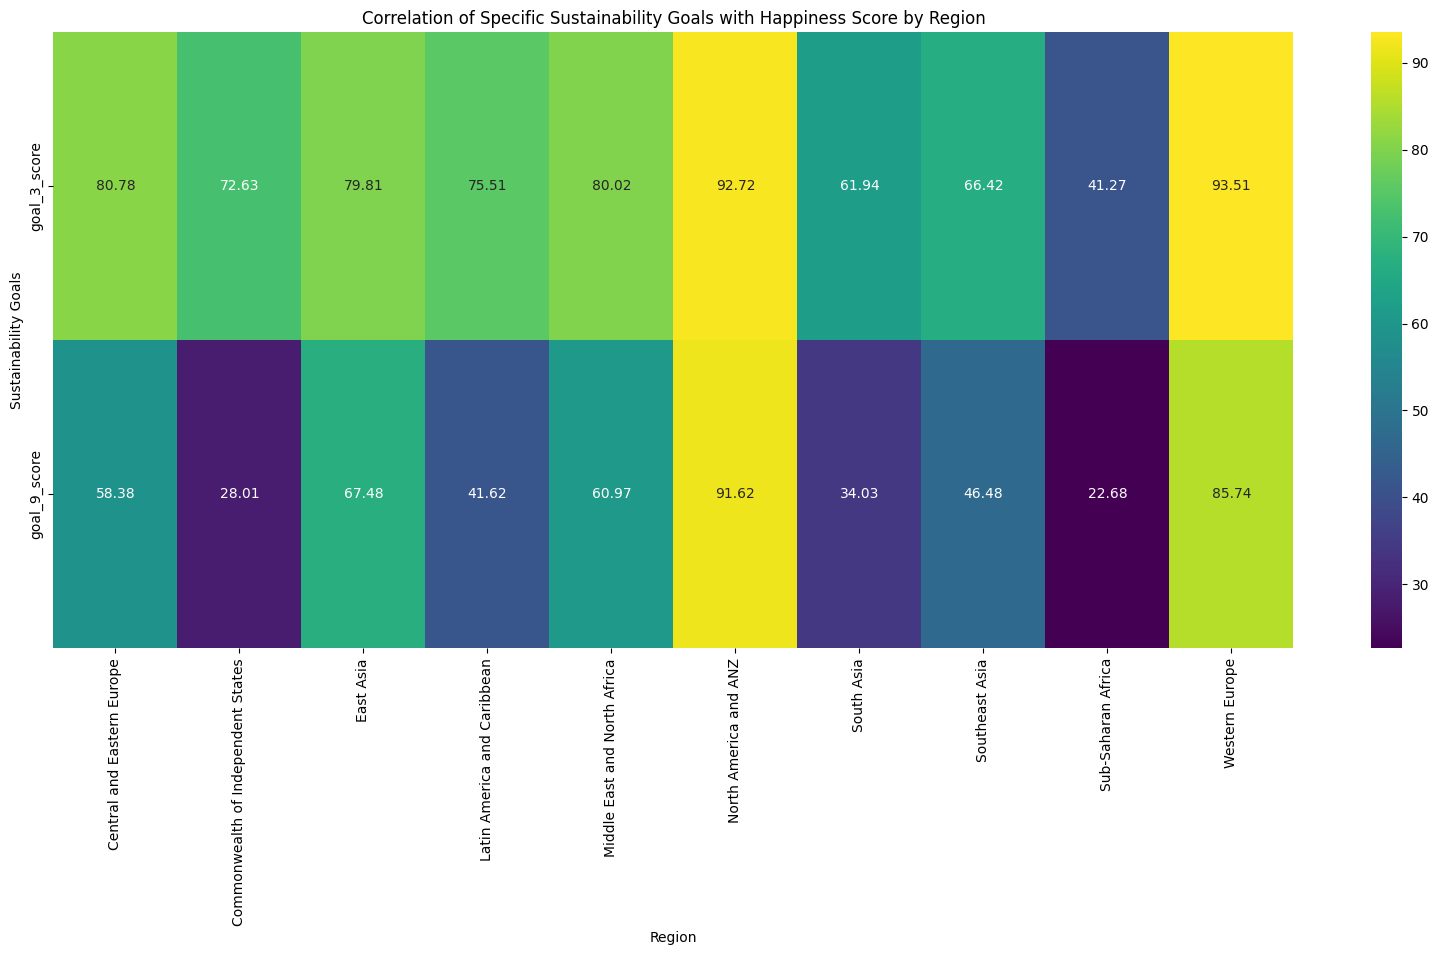

In [ ]:
# Analyzing correlation with specific goals
goal_correlation = merged_data.groupby('region')[['goal_3_score', 'goal_9_score']].mean()

# Plotting the Correlation of Specific Goals with Happiness Score for Different Regions
plt.figure(figsize=(20, 8))
sns.heatmap(goal_correlation.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Correlation of Specific Sustainability Goals with Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Sustainability Goals')
plt.show()



From the above heatmap, it can be concluded that Western Europe and North America and ANZ exhibit the highest positive correlation values among regions. This suggests that improvements in sustainability goals, specifically goal_3_score and goal_9_score, are associated with higher happiness scores in these regions. Interestingly, there is no noticeable negative correlation in the chart. However, Sub-Saharan Africa shows the lowest positive correlation with the two sustainability scores compared to other regions. This aligns with the fact that the happiness index in this region is generally the lowest.

In general, when considering the two sustainability indicators, goal_9_score appears to have a more pronounced correlation, while goal_3_score shows consistently high scores across all regions.

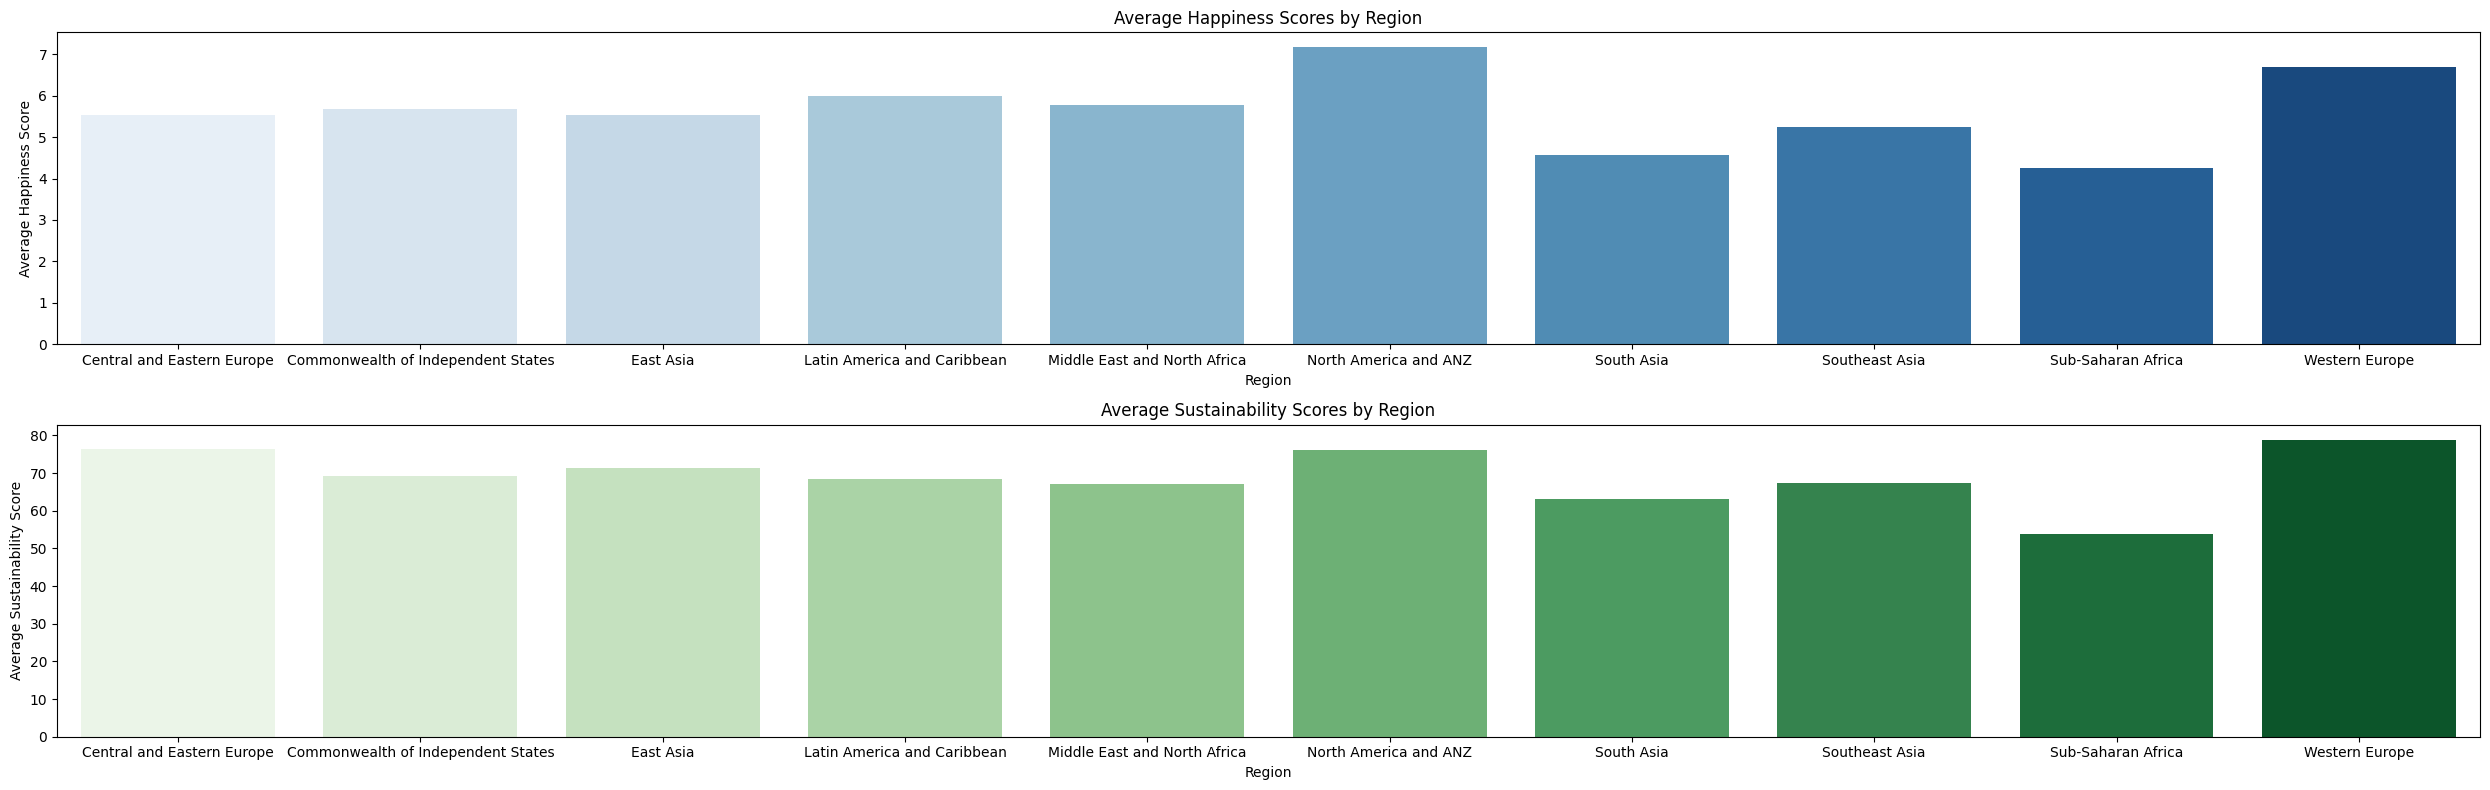

In [ ]:
# Regional Comparison: Calculate average scores by region
average_scores_by_region = merged_data.groupby('region')[['happiness_score', 'overall_score']].mean().reset_index()

# Plotting
plt.figure(figsize=(25, 8))

# Bar plot for average happiness scores
plt.subplot(2, 1, 1)
sns.barplot(x='region', y='happiness_score', data=average_scores_by_region, palette='Blues')
plt.title('Average Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')

# Bar plot for average sustainability scores
plt.subplot(2, 1, 2)
sns.barplot(x='region', y='overall_score', data=average_scores_by_region, palette='Greens')
plt.title('Average Sustainability Scores by Region')
plt.xlabel('Region')
plt.ylabel('Average Sustainability Score')

plt.tight_layout()
plt.show()

Looking at the chart above further strengthens the arguments mentioned earlier about the correlation between happiness scores and sustainability scores across regions. The most noticeable are Western Europe, North America and ANZ, and Sub-Saharan Africa.

#IV. CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-88-d180b590d443>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = merged_data.groupby('cluster').mean()


         happiness_score  gdp_per_capita  social_support  \
cluster                                                    
0               5.505673        1.064838        1.092150   
1               4.163214        0.487469        0.724363   
2               6.508986        1.421246        1.313667   

         healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
cluster                                                                      
0                       0.612391                      0.487904    0.173477   
1                       0.269978                      0.331732    0.214331   
2                       0.798250                      0.509536    0.196549   

         perceptions_of_corruption         year  overall_score  goal_1_score  \
cluster                                                                        
0                         0.099065  2019.091711      68.597487     77.546185   
1                         0.108447  2018.798834      52.681429     3

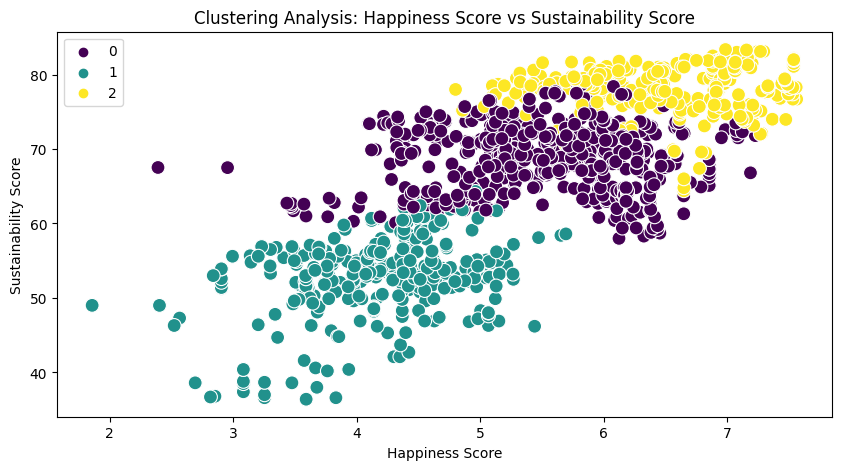

In [ ]:

# Select relevant columns for clustering
clustering_data = merged_data[['happiness_score', 'gdp_per_capita','healthy_life_expectancy', 'overall_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']]

#Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Analyze cluster characteristics
cluster_summary = merged_data.groupby('cluster').mean()

# Display the summary of each cluster
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_data, x='happiness_score', y='overall_score', hue='cluster', palette='viridis', s=100)
plt.title('Clustering Analysis: Happiness Score vs Sustainability Score')
plt.xlabel('Happiness Score')
plt.ylabel('Sustainability Score')
plt.legend()
plt.show()

Cluster Characteristics:

Cluster 1: High Happiness, High Sustainability

Countries in this cluster exhibit both high levels of happiness and sustainability. Potential leaders in achieving a balance between well-being and sustainable development.

Cluster 2: Moderate Happiness, Moderate Sustainability

Countries in this cluster maintain a moderate balance between happiness and sustainability. Average performers with room for improvement or optimization.

Cluster 3: Low Happiness, Low Sustainability

Countries in this cluster face challenges in both happiness and sustainability. May require targeted interventions for improvement.

Number of countries in each cluster:
0    567
1    343
2    305
Name: cluster, dtype: int64


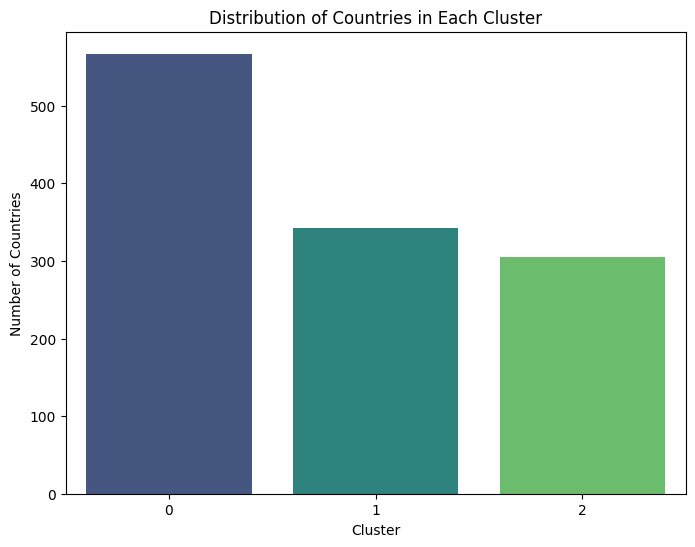

         happiness_score  overall_score
cluster                                
0               5.505673      68.597487
1               4.163214      52.681429
2               6.508986      78.152698


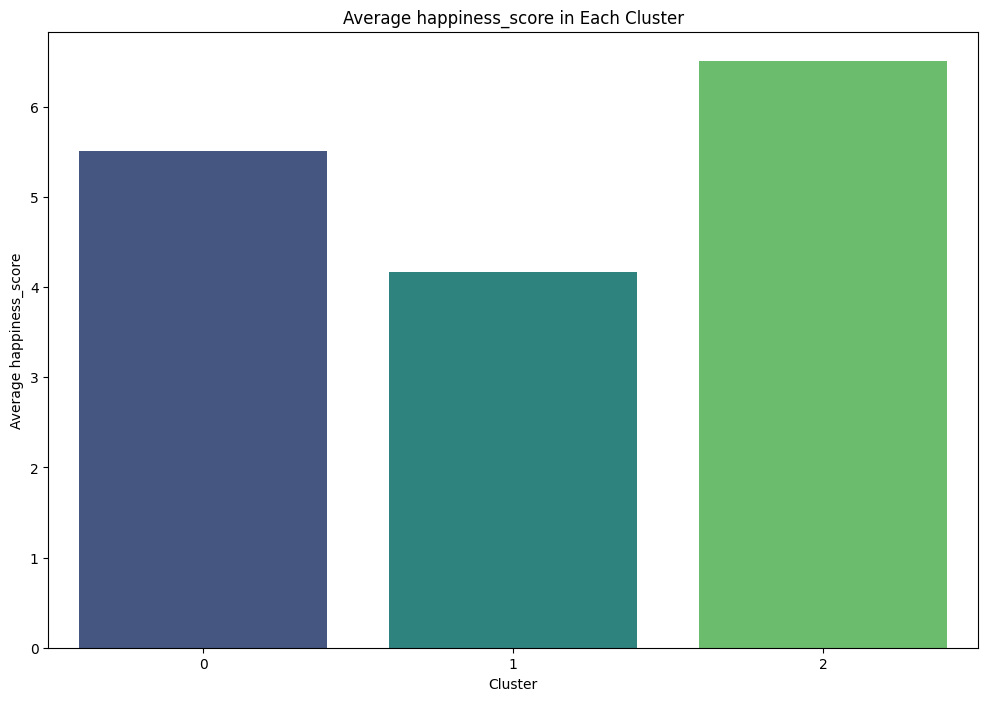

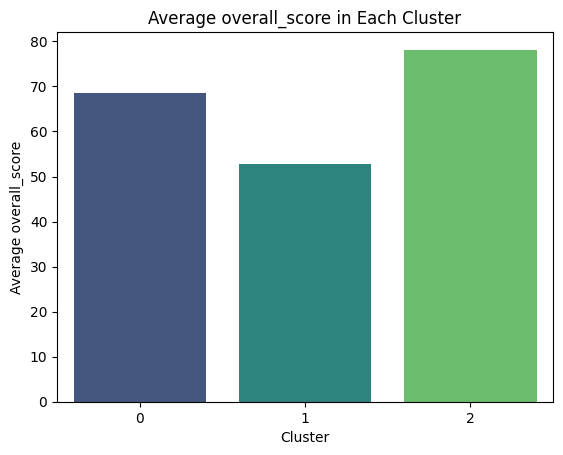

In [ ]:
# Analyze the distribution of countries in each cluster
cluster_counts = merged_data['cluster'].value_counts()
print("Number of countries in each cluster:")
print(cluster_counts)

# Visualize the distribution of countries in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='cluster', palette='viridis')
plt.title('Distribution of Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.show()

# Explore characteristics of each cluster
cluster_features = ['happiness_score', 'overall_score']
cluster_summary = merged_data.groupby('cluster')[cluster_features].mean()

# Display the summary of each cluster's characteristics
print(cluster_summary)

# Visualize characteristics of each cluster
plt.figure(figsize=(12, 8))
for feature in cluster_features:
    sns.barplot(data=cluster_summary.reset_index(), x='cluster', y=feature, palette='viridis')
    plt.title(f'Average {feature} in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.show()

The distribution of the number of countries in each cluster is uneven, with the highest count observed in Cluster 0, indicating countries with average happiness scores and sustainability scores. Cluster 2, representing countries with the highest scores, has the fewest number of countries. This suggests the concerted efforts of countries toward improving the quality of life.

Overall, the happiness levels of countries within each cluster and their sustainability scores are similar.







/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


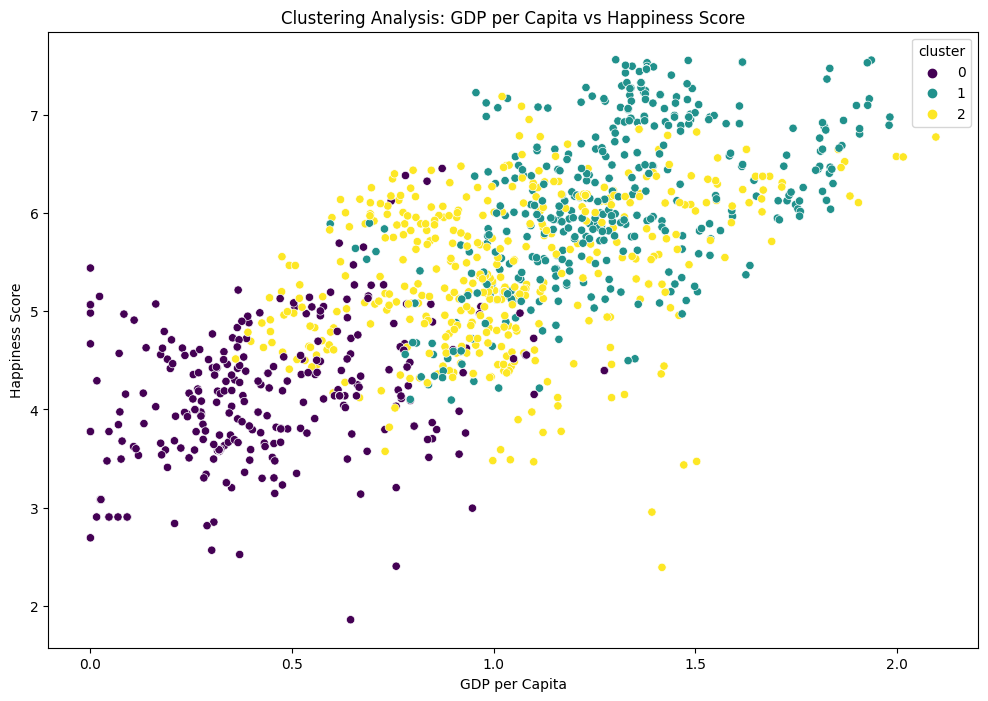

Mean GDP per Capita by Cluster:
cluster
0    0.462740
1    1.312024
2    1.047296
Name: gdp_per_capita, dtype: float64


In [ ]:
# Extract relevant columns
data = merged_data[['gdp_per_capita', 'happiness_score', 'overall_score']]

# Perform K-means clustering (you can adjust the number of clusters as needed)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Perform clustering on a copy of the data to avoid modifying the original DataFrame
merged_data_copy = merged_data.copy()
merged_data_copy['cluster'] = kmeans.fit_predict(data)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gdp_per_capita', y='happiness_score', hue='cluster', data=merged_data_copy, palette='viridis')
plt.title('Clustering Analysis: GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Analyze income levels by cluster
income_by_cluster = merged_data_copy.groupby('cluster')['gdp_per_capita'].mean()
print("Mean GDP per Capita by Cluster:")
print(income_by_cluster)


The distribution of countries across the three clusters is not clear, specifically the cluster 1 and 2, which is country with medium score and highest score.It suggests that the algorithm might face challenges in clearly distinguishing patterns based on the chosen features (GDP per Capit and Happiness Score or Sustainability Score).
It could indicate that the relationship between GDP per Capita and Happiness Score or Sustainability Score may not be well-defined or that other factors play a significant role in determining cluster membership. Further investigation and feature exploration may be needed to refine the clustering approach.

#V.CONCLUSION


From the above analysis and visualizations, several conclusions can be drawn:

1. Happiness Score Trend:

The global happiness trend has shown a significant increase from 2015 to 2023, despite a noticeable decrease from 2021 to 2023. This decrease could be attributed to the impact of factors such as the Covid-19 pandemic, economic fluctuations, political instability, and societal changes.

2. Sustainability Score Trend:

The overall sustainability trend has also increased dramatically from 2015 to 2023, with a slight dip in 2018 and a sharp decline in 2022 and 2023. Post-COVID-19 effects and ongoing conflicts contribute to increased global political instability, impacting the world economy.

3. Correlation Analysis:

The correlation matrix indicates that specific sustainability goals, particularly goal_3_score (Good Health and Well-being) and goal_9_score (Industry, Innovation, and Infrastructure), have a positive correlation with happiness scores. Countries with higher scores in these sustainability goals tend to have higher happiness indices.

4. Regional Analysis:

A scatter plot by region suggests that countries with high sustainability scores generally have high happiness scores, but there is dispersion within regions, especially in South Asia and Sub-Saharan Africa. Western Europe, North America, and ANZ exhibit a higher positive correlation between sustainability and happiness scores.

5. Top 5 Highest and Lowest Scores:

The sustainability scores of the top 5 countries are approximately double to nearly 1.5 times higher than those of the bottom 5 countries. Similarly, happiness scores of the highest-ranking countries are higher than those of the lowest-ranking countries.

6. Cluster Analysis:

Clustering analysis identifies three clusters:
Cluster 1: High Happiness, High Sustainability
Cluster 2: Moderate Happiness, Moderate Sustainability
Cluster 3: Low Happiness, Low Sustainability
The distribution of countries in each cluster is uneven, with Cluster 0 having the highest count. This suggests a connection between efforts to improve quality of life and cluster membership.

7. GDP per Capita and Happiness Score Clustering:

The clustering based on GDP per Capita and Happiness Score does not show a clear distribution across clusters, especially for clusters 1 and 2. It indicates challenges in clearly distinguishing patterns based on these features.
In summary, the analysis highlights the complex interplay between various factors such as sustainability goals, regional dynamics, and economic indicators in influencing global happiness trends. Further exploration and refinement of the clustering approach may be needed to better capture these intricate relationships.

THANK YOU FOR YOUR ATTENTION!